<a href="https://colab.research.google.com/github/LTJ508/Quantum_Computing/blob/main/Qiskit%20Practice/QC%20-%20Part%20-%20A%20-%20Live%20Session/Live_Session_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">Lecture - 08</font>

## Install Package

In [1]:
!pip install qsurface
!pip install matplotlib==3.5.1
!pip install pandas==1.3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 43.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.21.0 requires matplotlib>=3.7.1, but you have matplotlib 3.5.1 which is incompatible.
cudf-cu12 24.6.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
plotnine 0.13.6 requires matplotlib>=3.7.0, but you have matplotlib 3.5.1 which is incompatible.
  Using cached pandas-1.3.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached pandas-1.3.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    

In [22]:
!pip install pymatching --upgrade
!pip install stim --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.4/619.4 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 40.4 MB/s eta 0:00:00


## Import Library

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
from qsurface.main import initialize, run
from qsurface.main import BenchmarkDecoder
from qsurface.threshold import run_many
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import numpy as np
import stim
import pymatching
from scipy.sparse import csc_matrix

## Ensamble Decoder for Surface Code Error Correction

### Initializing Simulation

In [12]:
for i in range(6):
  for j in range(6):
    if (i==j):
      code, decoder = initialize((i, j), "planar", "mwpm", enabled_errors=["pauli"])
      run(code, decoder, iterations=10, error_rates={"p_bitflip": 0.1})

Running iteration 10/10
Running iteration 10/10
Running iteration 10/10
Running iteration 10/10
Running iteration 10/10
Running iteration 10/10


### Benchmarking

In [13]:
code, decoder = initialize((6, 6), "planar", "mwpm", enabled_errors=["pauli"])
benchmarker = BenchmarkDecoder({"decode": "duration"})
run(code, decoder, iterations=10, error_rates={"p_bitflip": 0.1}, benchmark=benchmarker)

Running iteration 10/10


{'no_error': 3,
 'benchmark': {'decoded': 10,
  'iterations': 10,
  'seed': 812.267206738,
  'duration/decode/mean': 0.0016095706000101018,
  'duration/decode/std': 0.0005173083399287552}}

### Benchmarking for Multiple Error

In [14]:
code, decoder = initialize((6, 6), "planar", "mwpm", enabled_errors=["pauli"])
benchmarker = BenchmarkDecoder({"decode": "duration"})

for p in [0.01, 0.02, 0.03, 0.04, 0.05]:
  result = run(code, decoder, iterations=10, error_rates={"p_bitflip": p}, benchmark=benchmarker)
  print(f"p = {p}, result = {result}")

Running iteration 10/10
p = 0.01, result = {'no_error': 9, 'benchmark': {'decoded': 10, 'iterations': 10, 'seed': 957.946388561, 'duration/decode/mean': 0.0004021766000050775, 'duration/decode/std': 0.00017349554869218795}}
Running iteration 10/10
p = 0.02, result = {'no_error': 7, 'benchmark': {'decoded': 31, 'iterations': 31, 'seed': 957.964534748, 'duration/decode/mean': 0.0007030913809503978, 'duration/decode/std': 0.00030020678459132167}}
Running iteration 10/10
p = 0.03, result = {'no_error': 9, 'benchmark': {'decoded': 63, 'iterations': 63, 'seed': 957.976742454, 'duration/decode/mean': 0.0007957902500130842, 'duration/decode/std': 0.000290390475795979}}
Running iteration 10/10
p = 0.04, result = {'no_error': 6, 'benchmark': {'decoded': 106, 'iterations': 106, 'seed': 957.991194126, 'duration/decode/mean': 0.0010104741860538714, 'duration/decode/std': 0.00036780965834838316}}
Running iteration 10/10
p = 0.05, result = {'no_error': 9, 'benchmark': {'decoded': 160, 'iterations': 1

### Ploting and Visualizing Result

Drawing 1/1: Initial


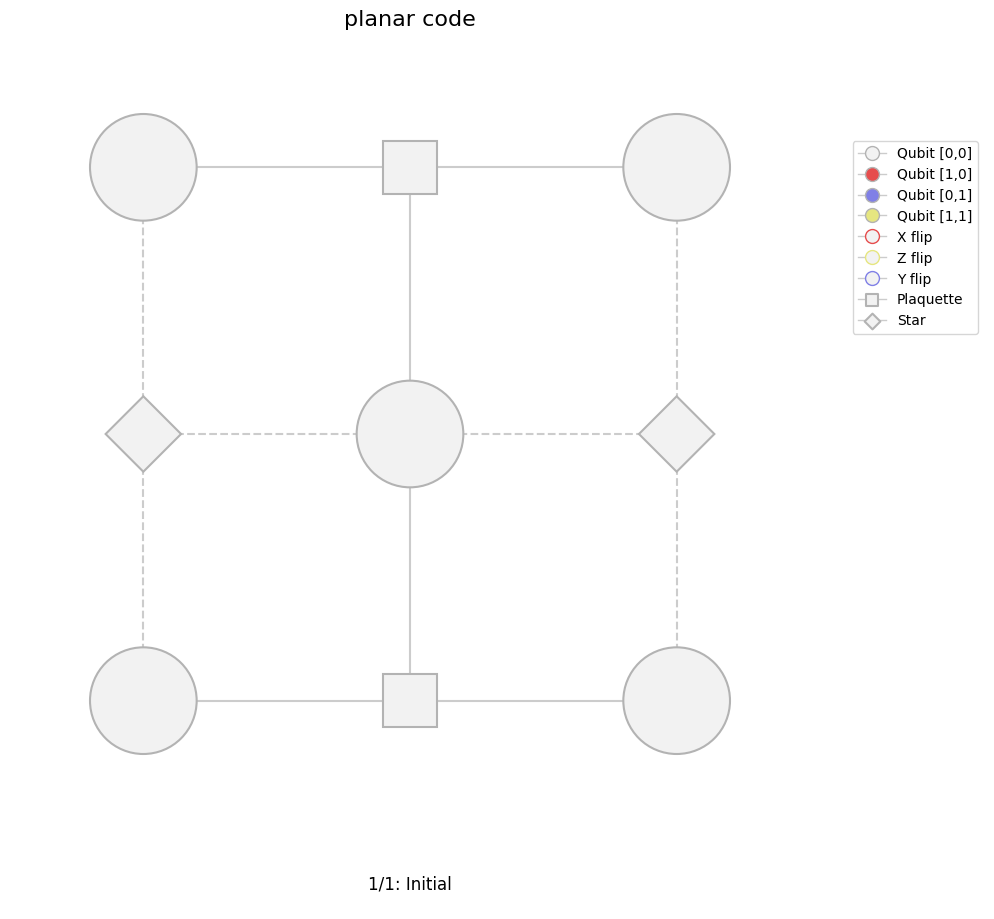

Drawing 2/2: Errors applied


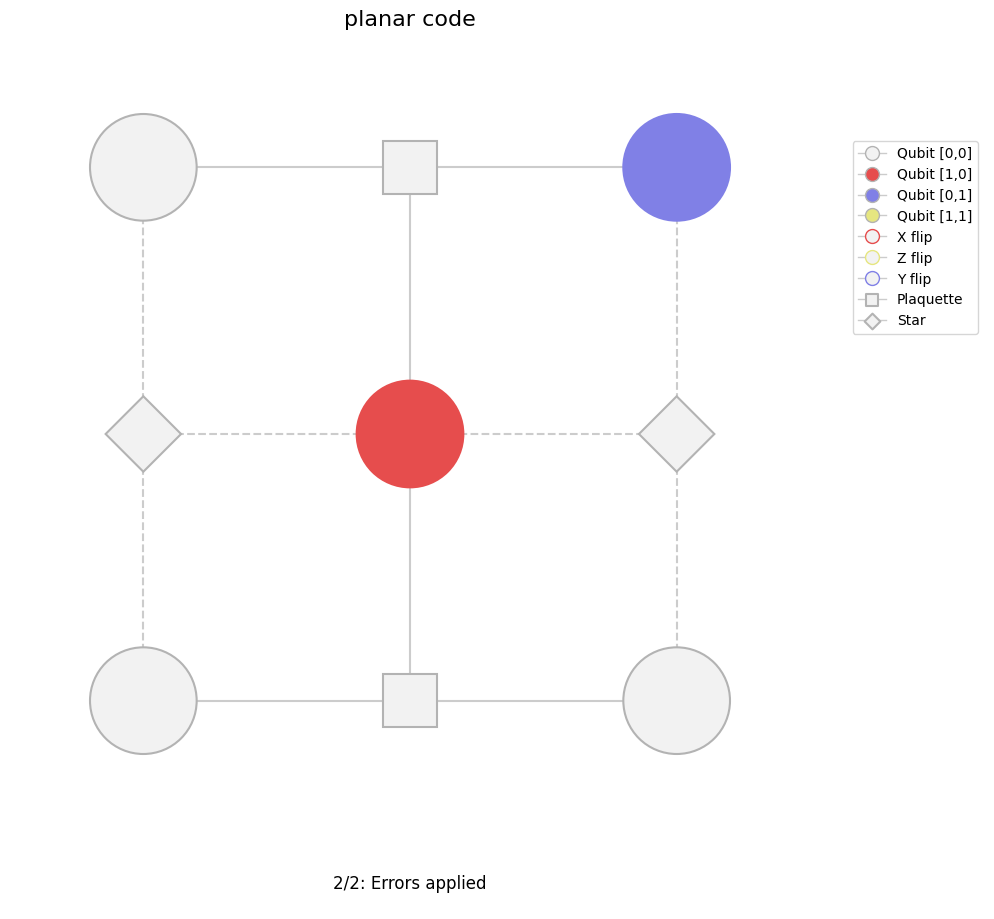

Drawing 3/3: Ancilla-qubits measured


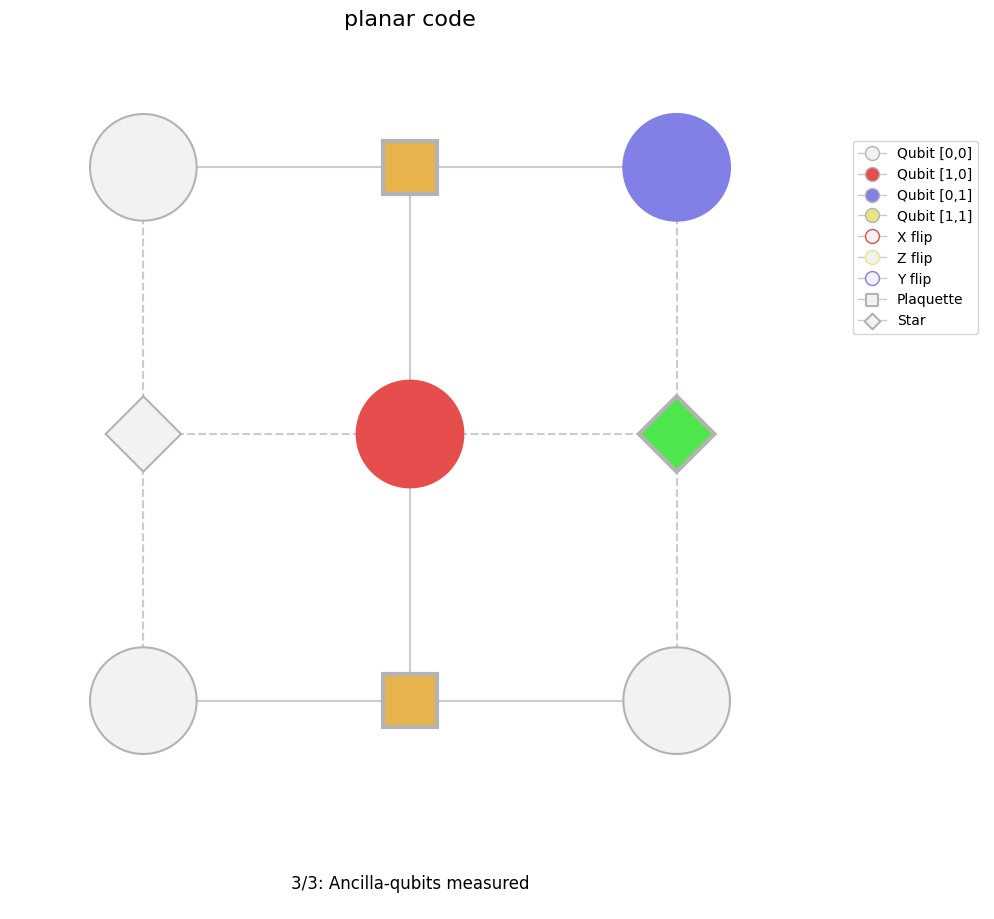

Drawing 4/4: Matchings found


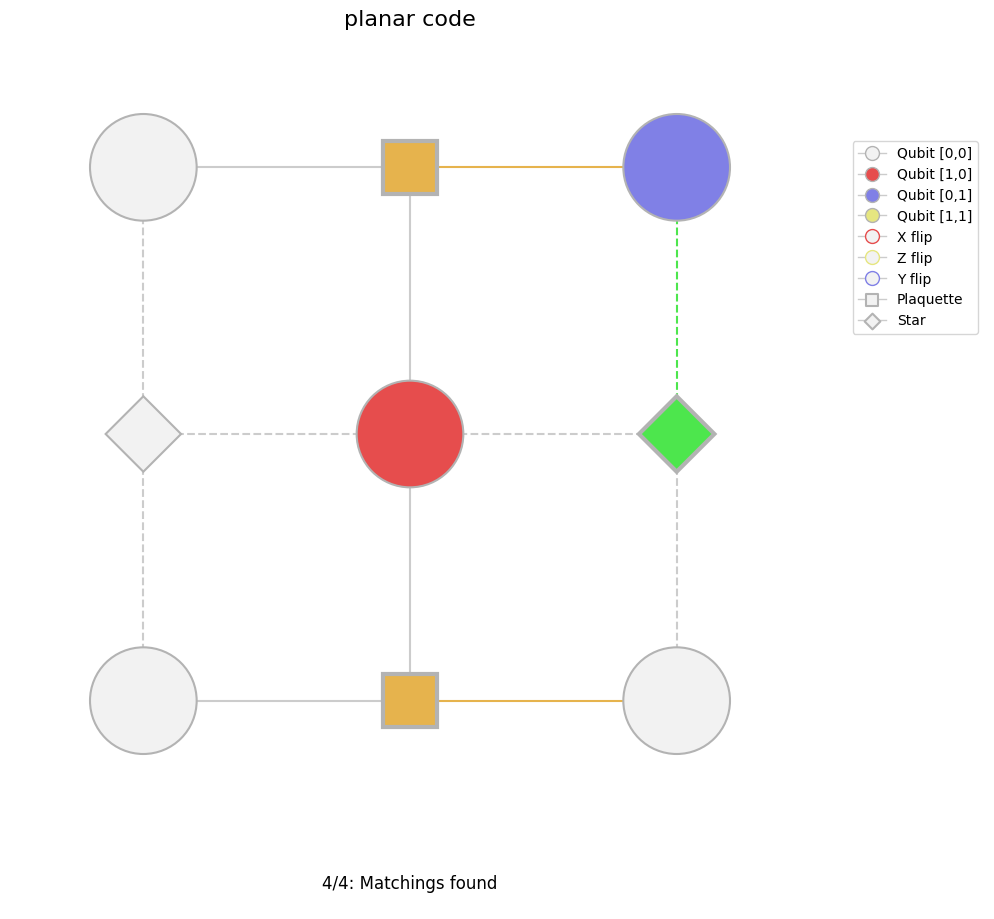

Drawing 5/5: Decoded


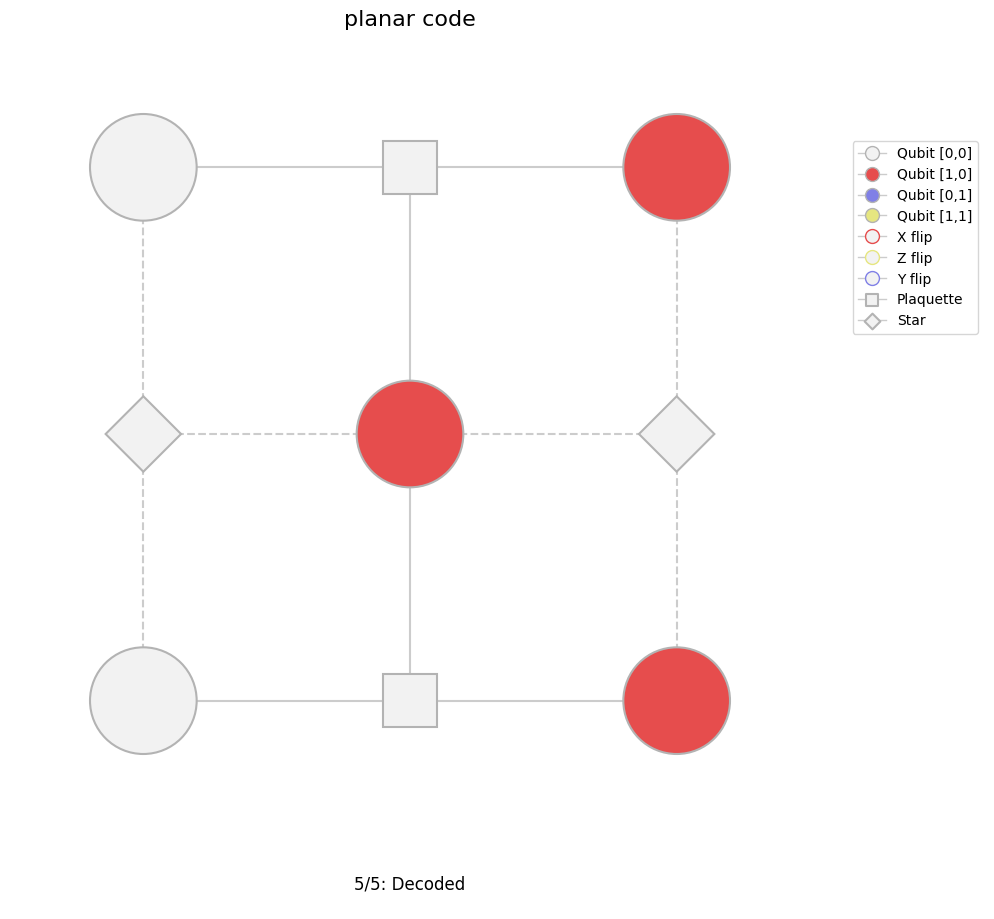


Drawing 1/1: Initial


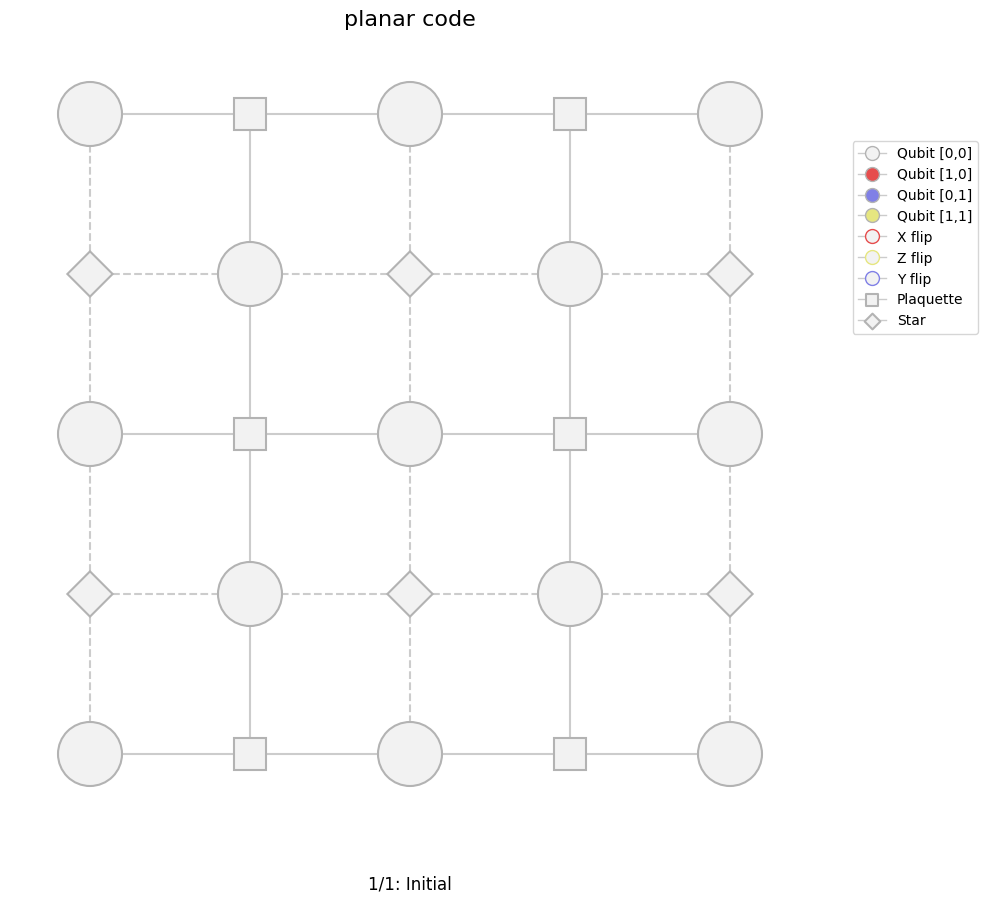

Drawing 2/2: Errors applied


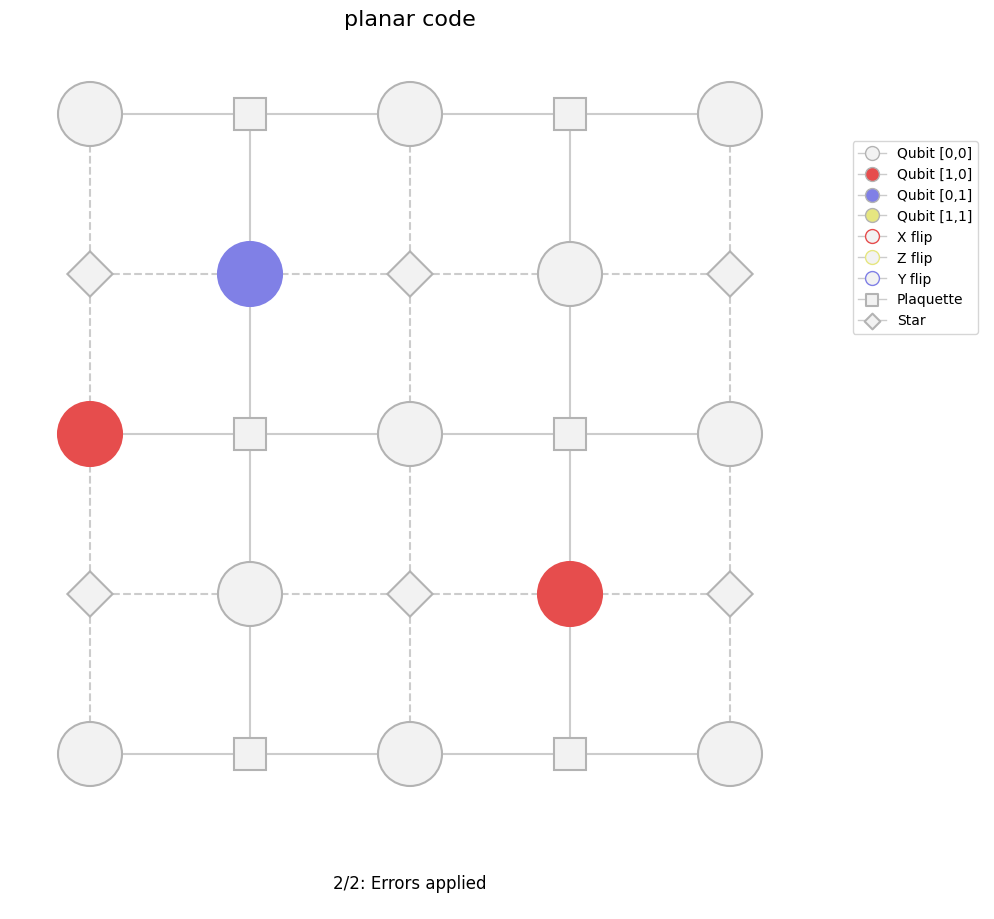

Drawing 3/3: Ancilla-qubits measured


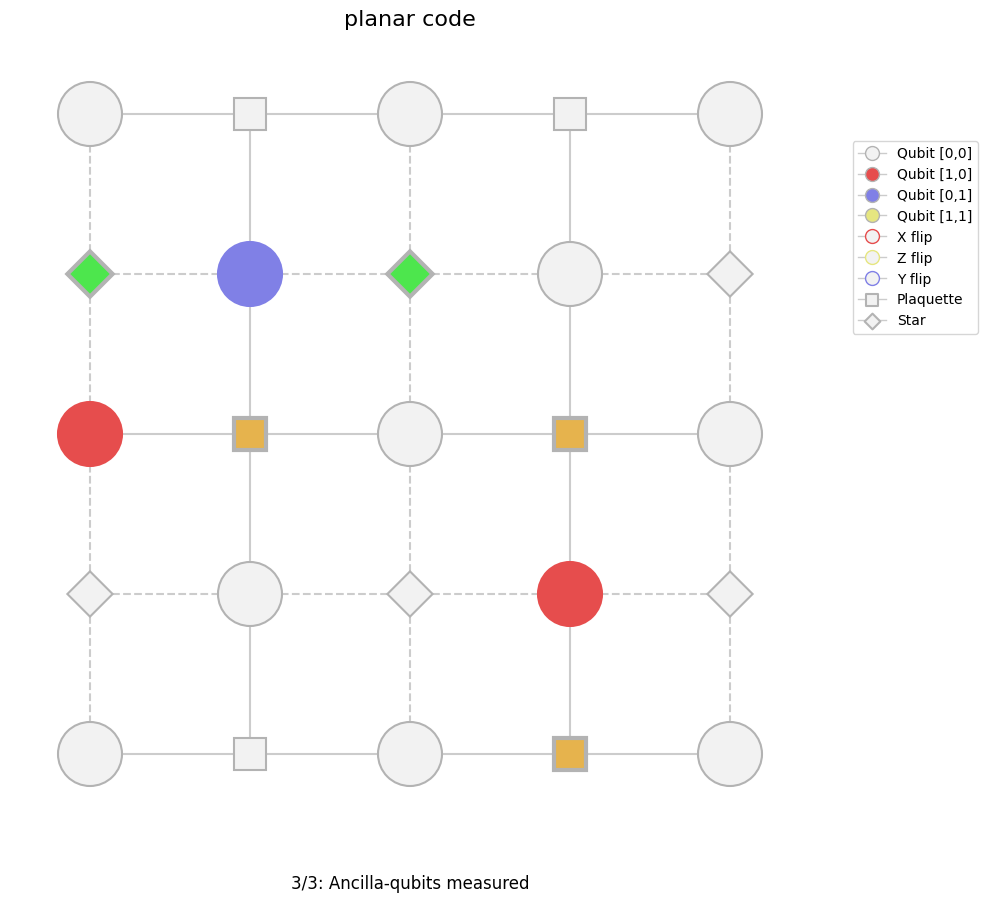

Drawing 4/4: Matchings found


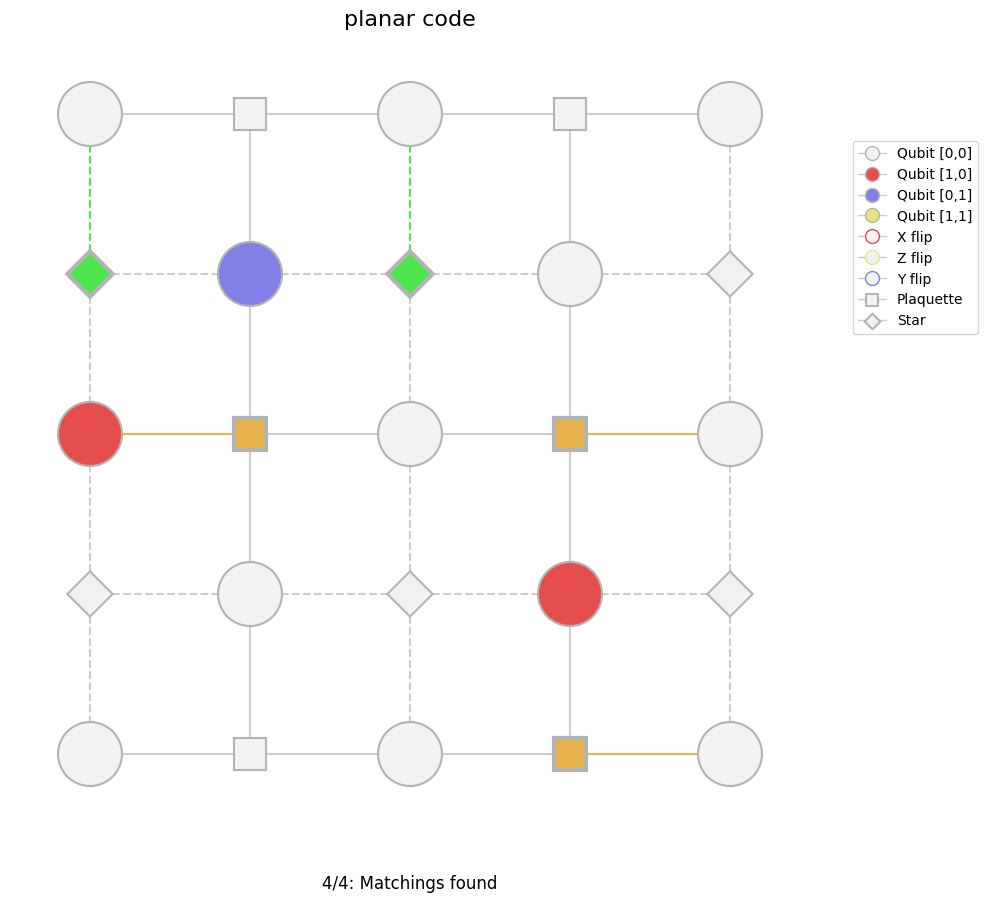

Drawing 5/5: Decoded


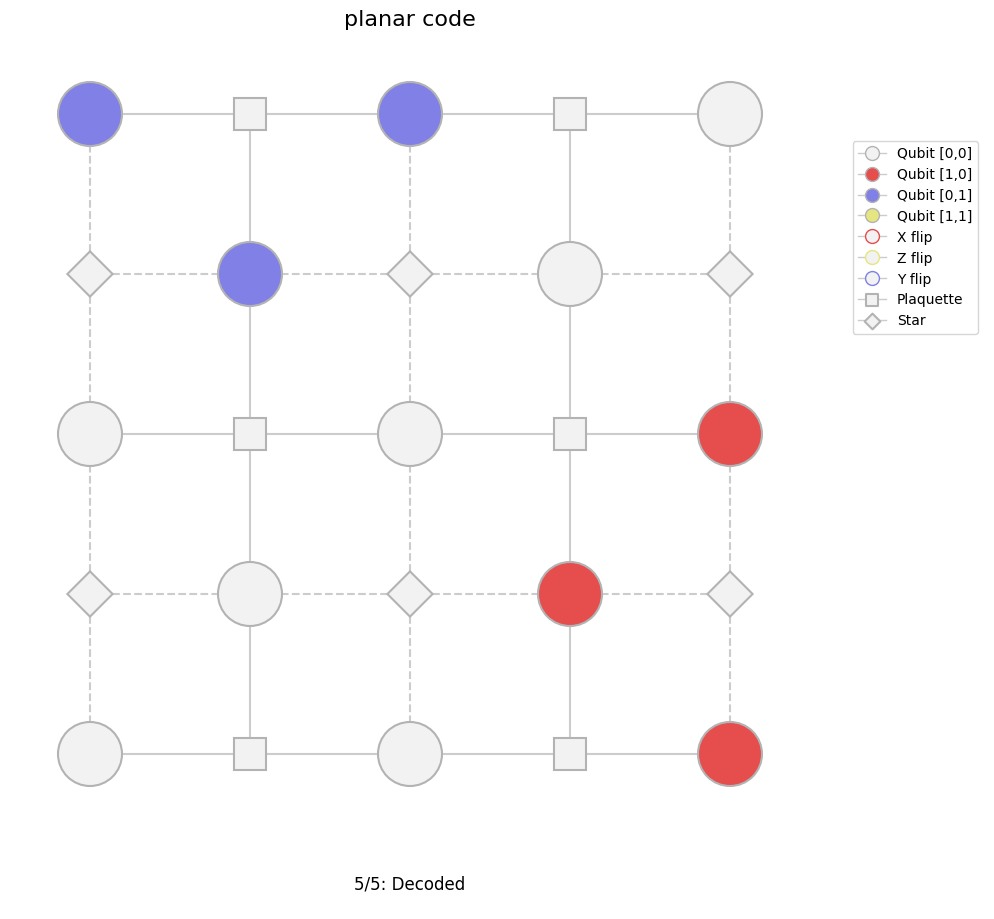


Drawing 1/1: Initial


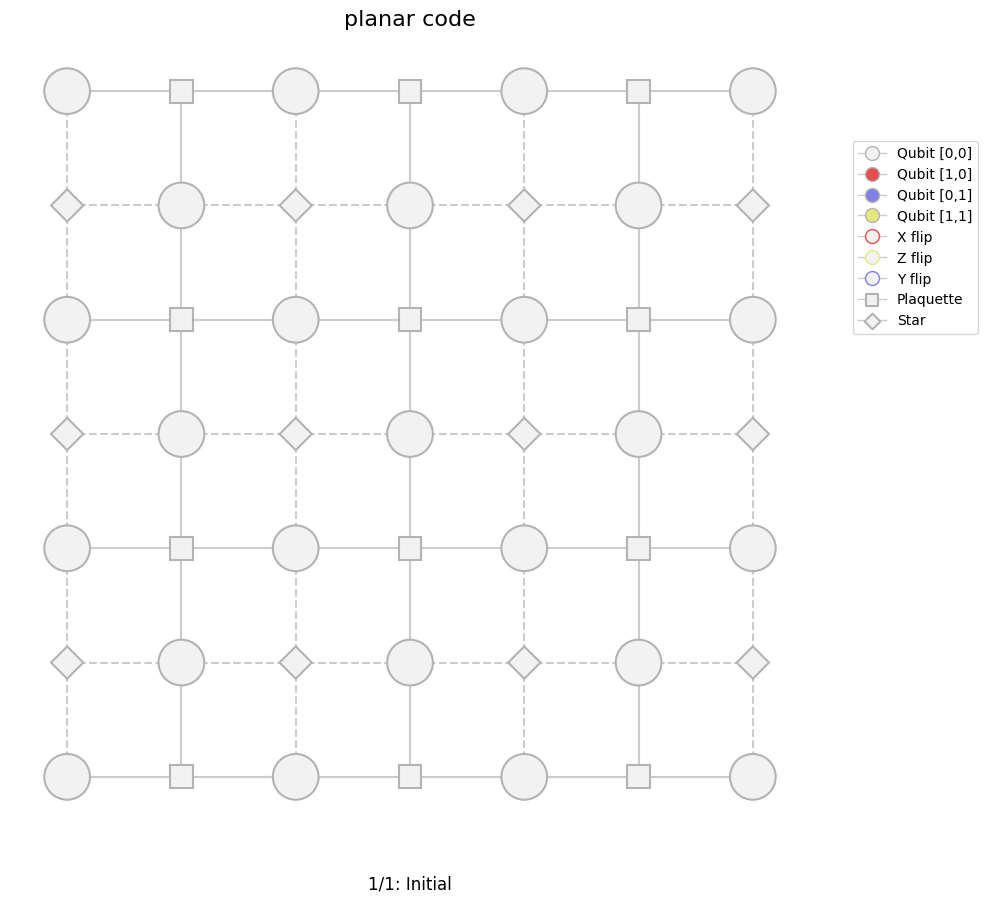

Drawing 2/2: Errors applied


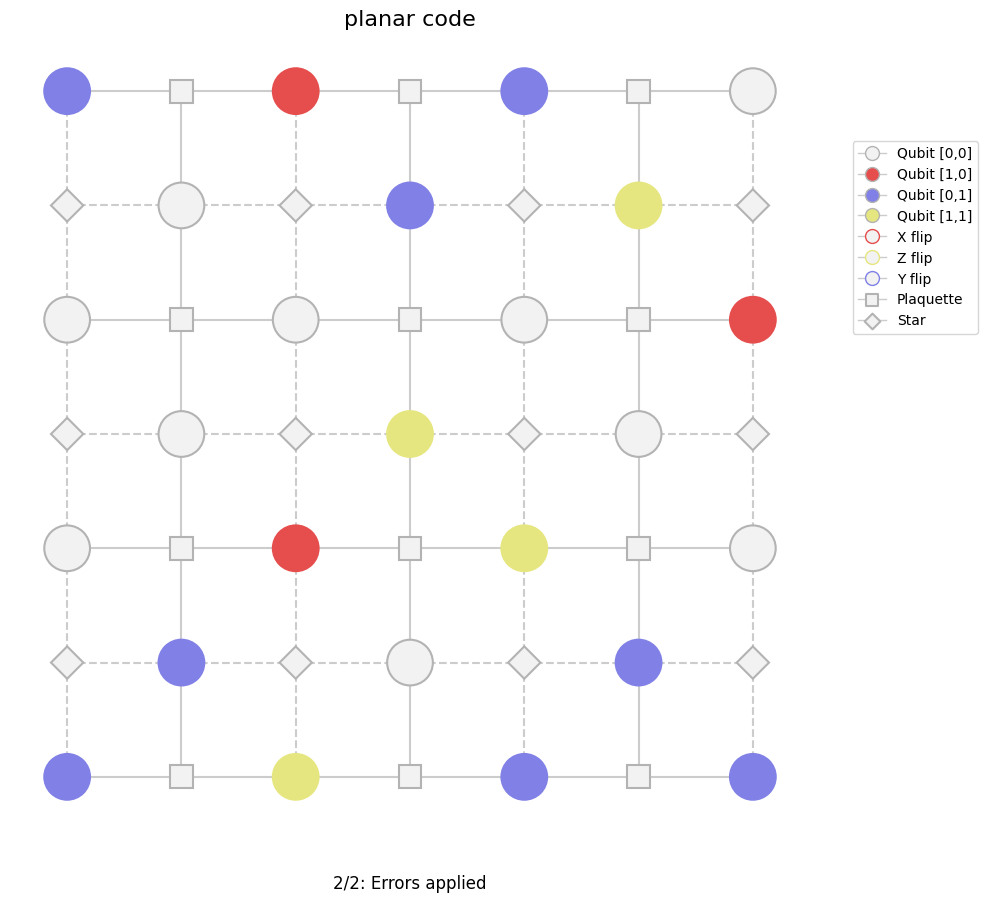

Drawing 3/3: Ancilla-qubits measured


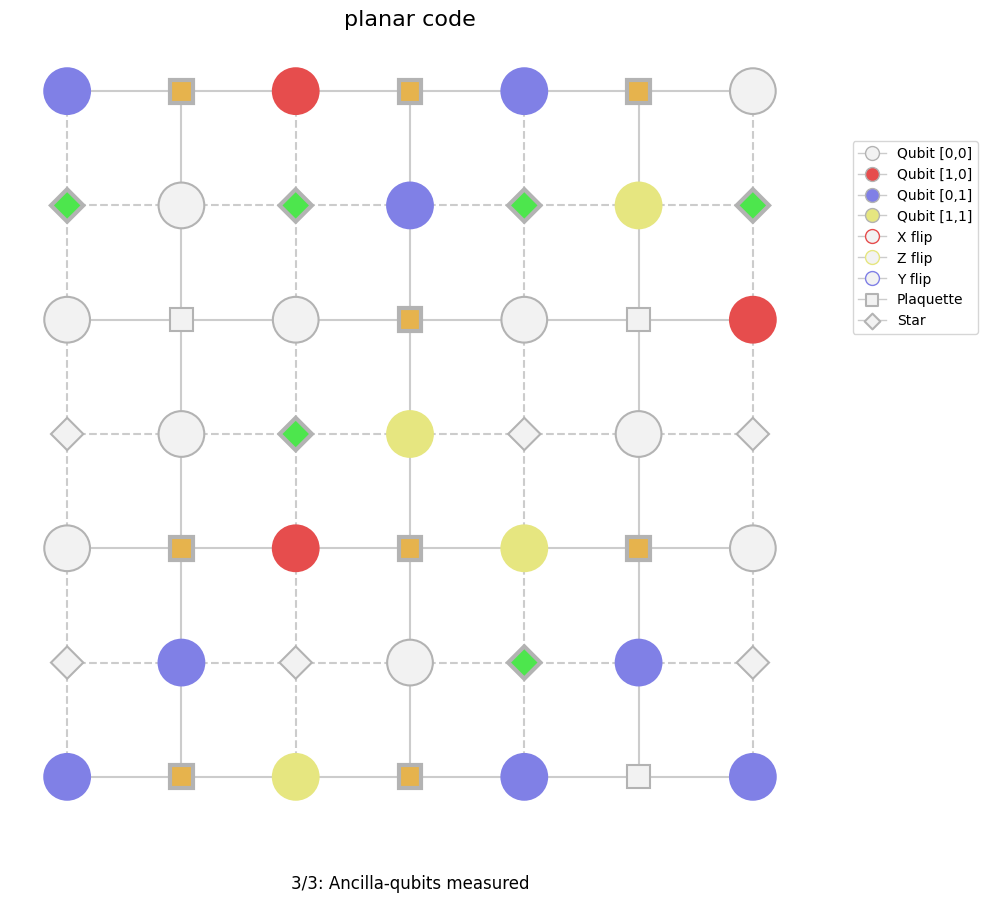

Drawing 4/4: Matchings found


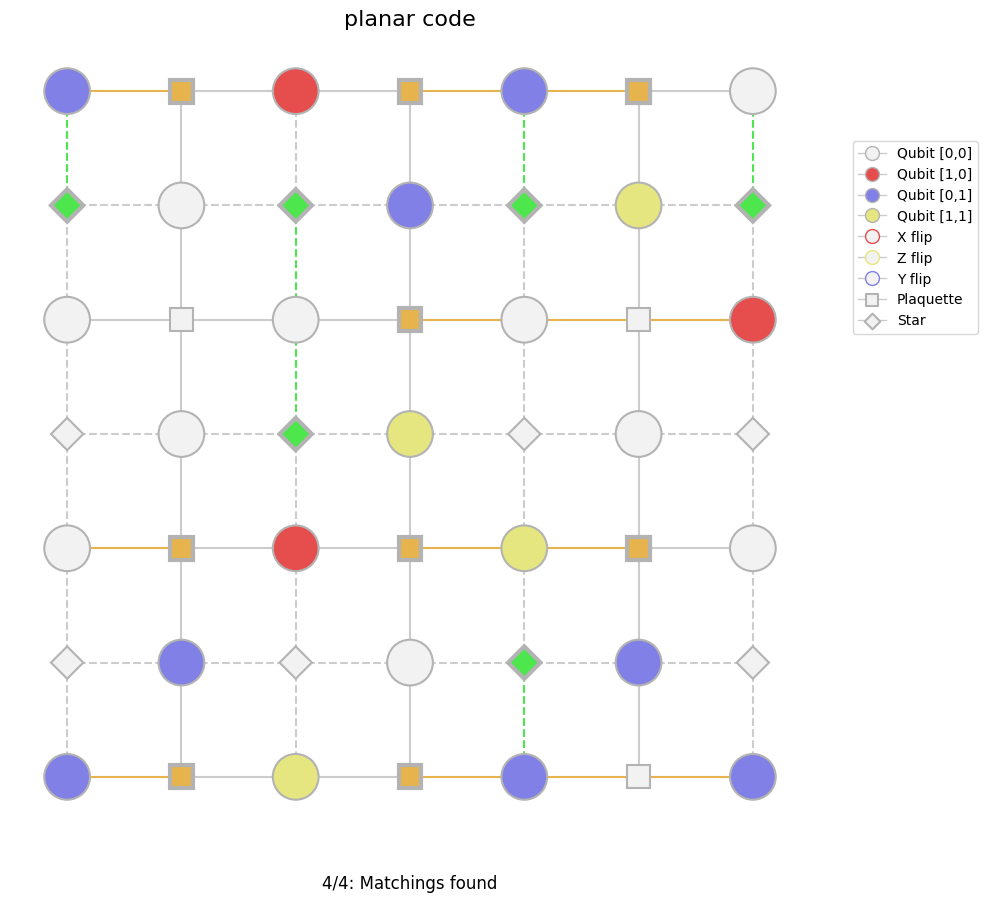

Drawing 5/5: Decoded


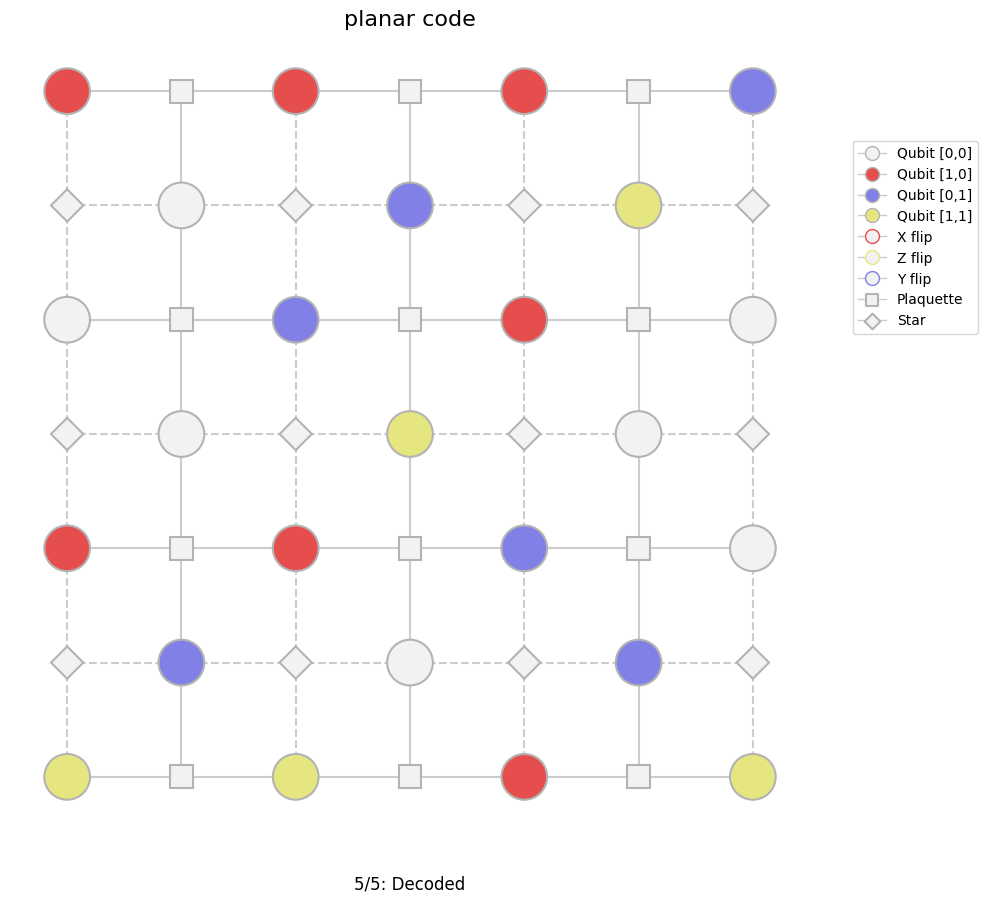


Drawing 1/1: Initial


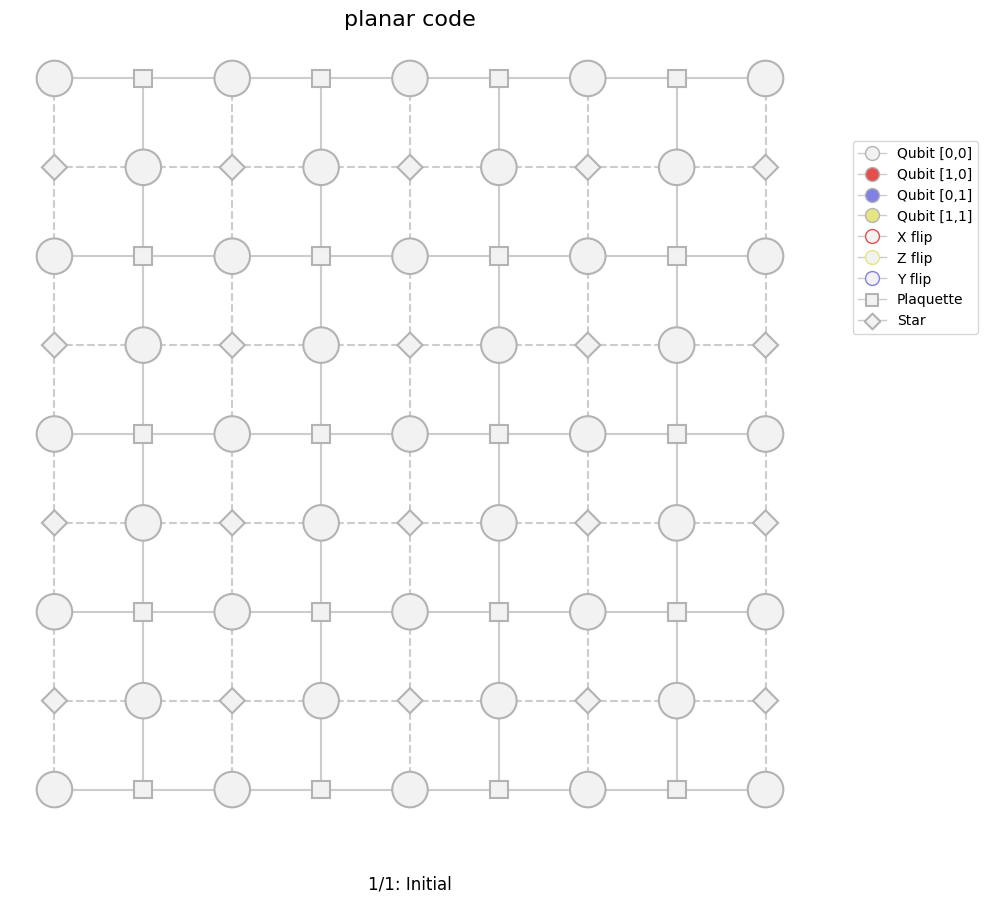

Drawing 2/2: Errors applied


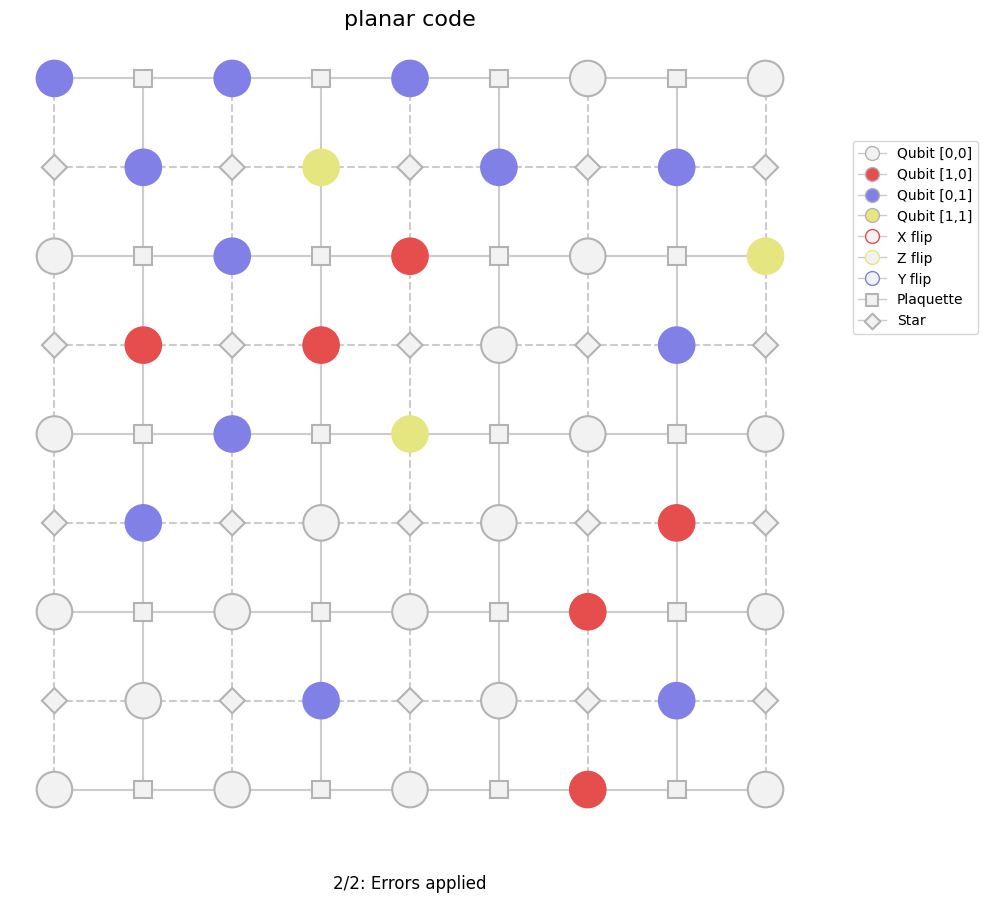

Drawing 3/3: Ancilla-qubits measured


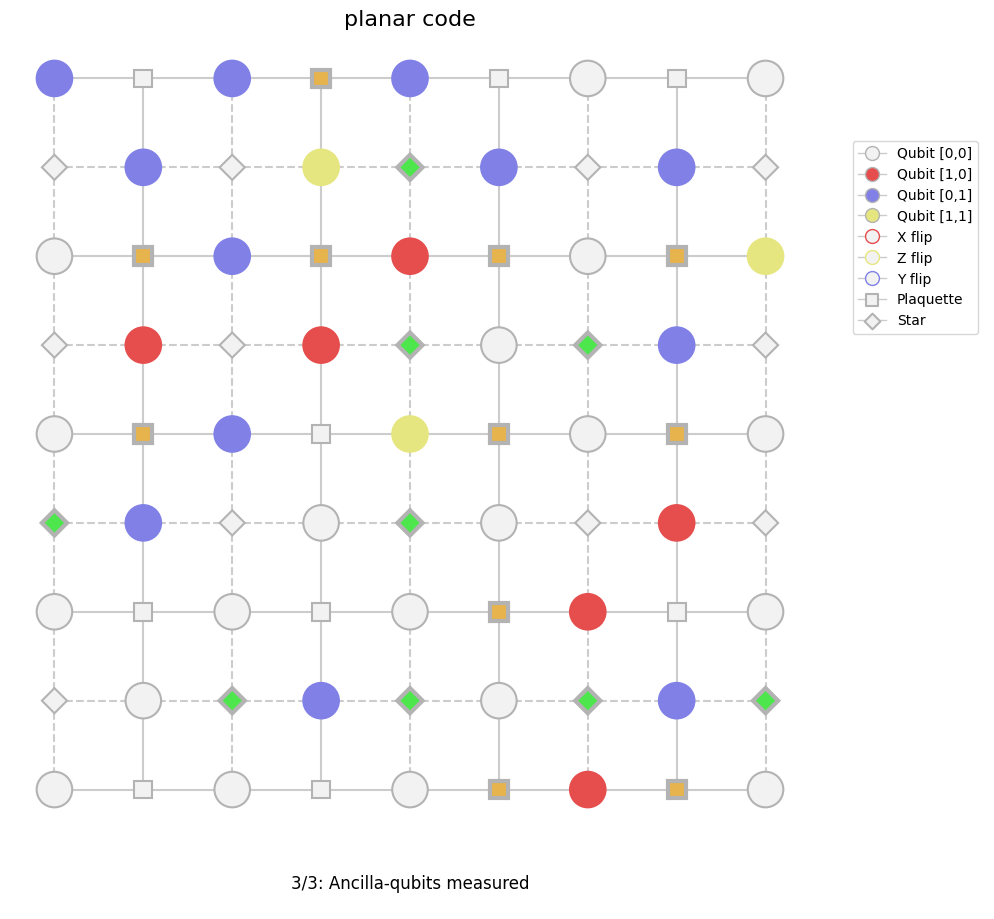

Drawing 4/4: Matchings found


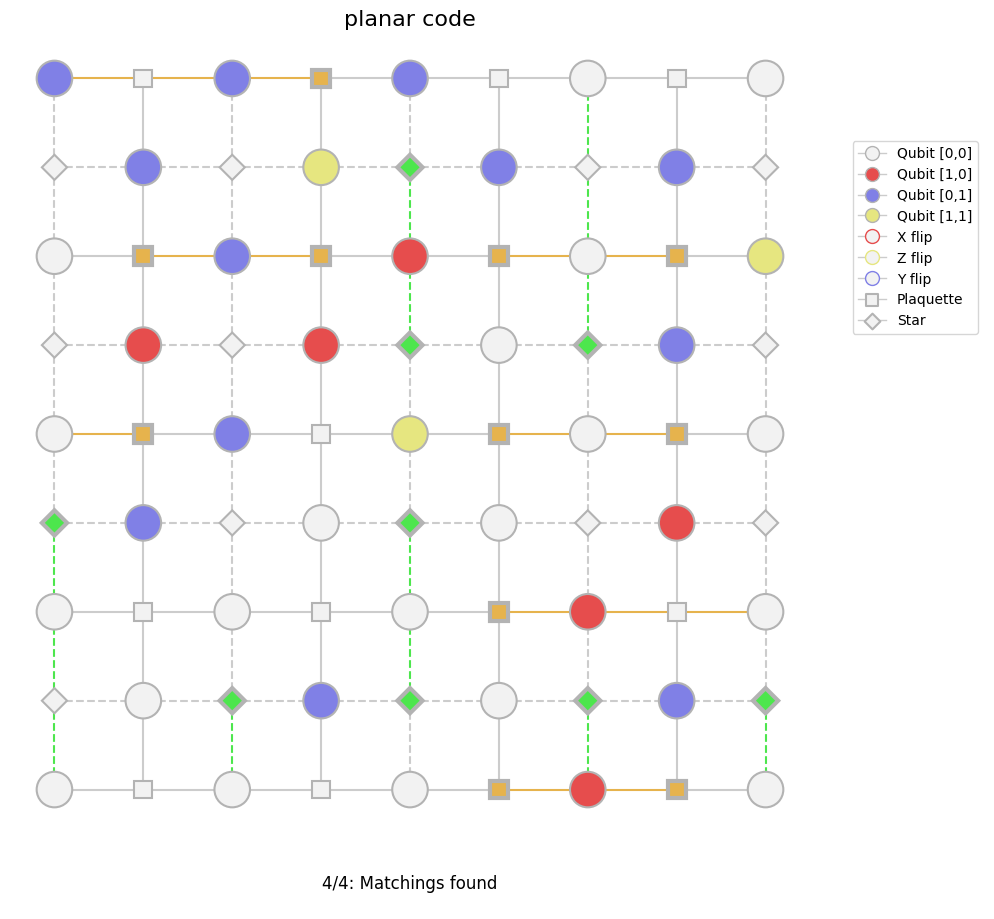

Drawing 5/5: Decoded


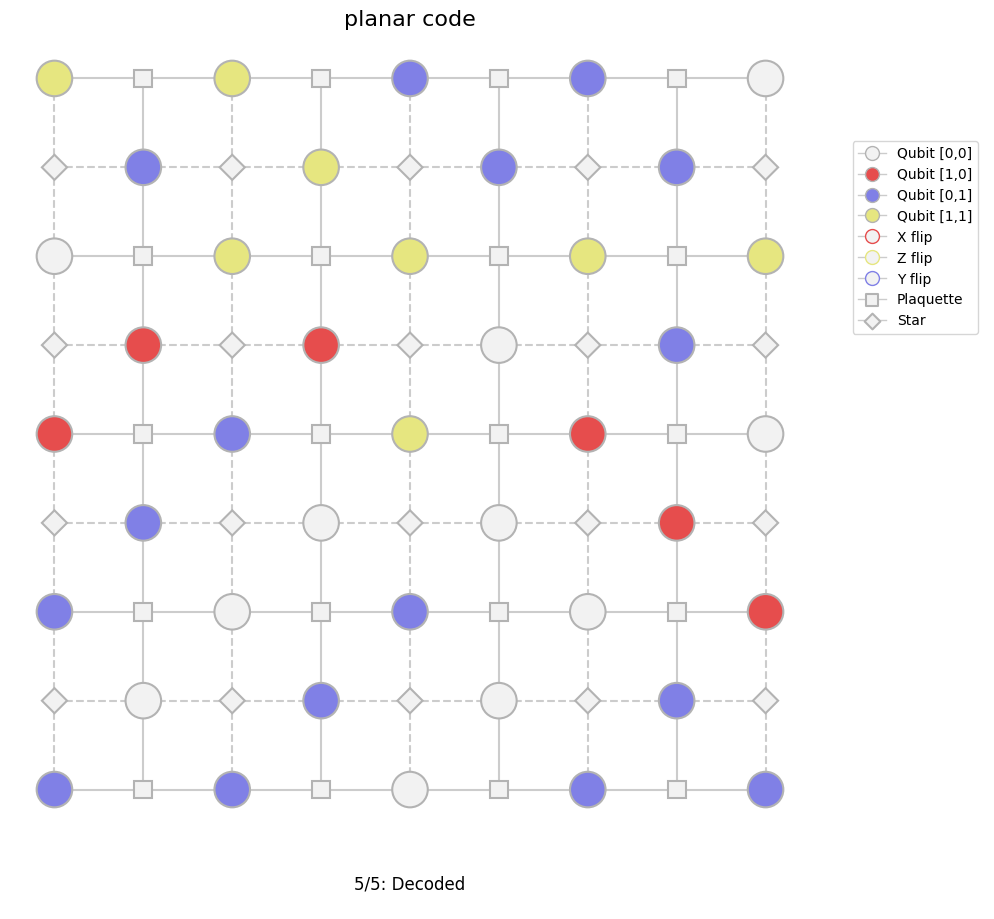

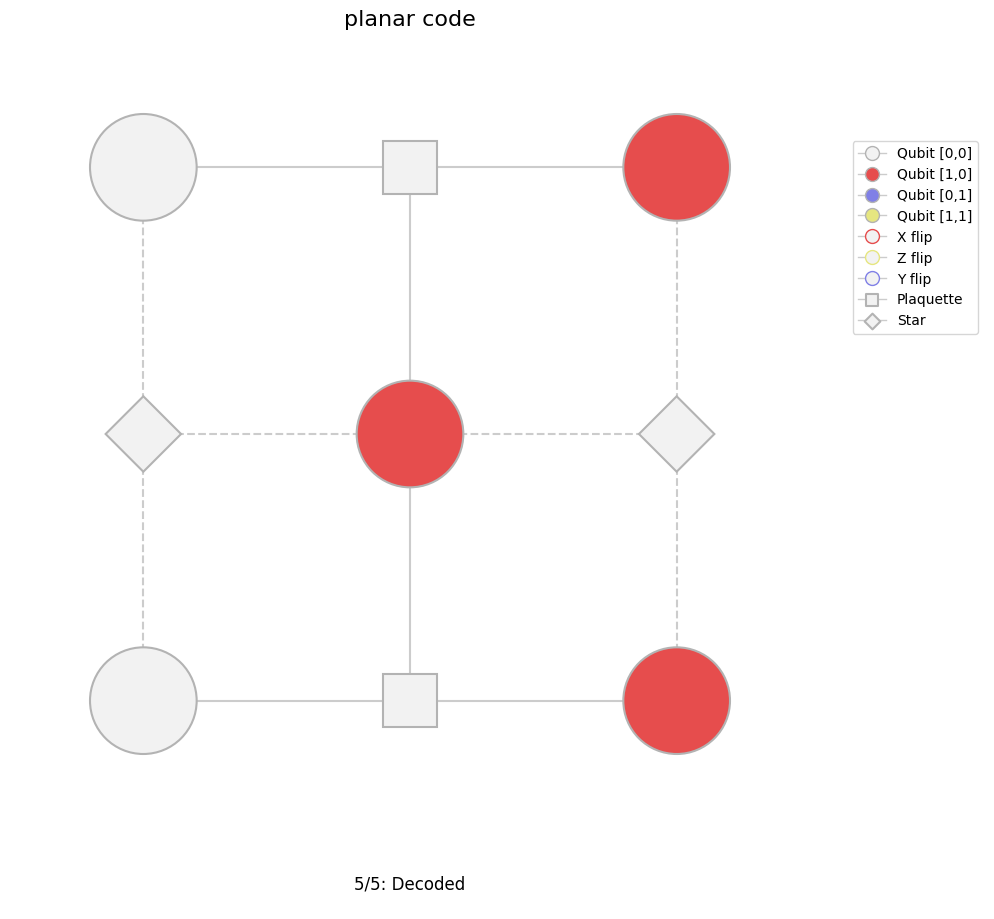

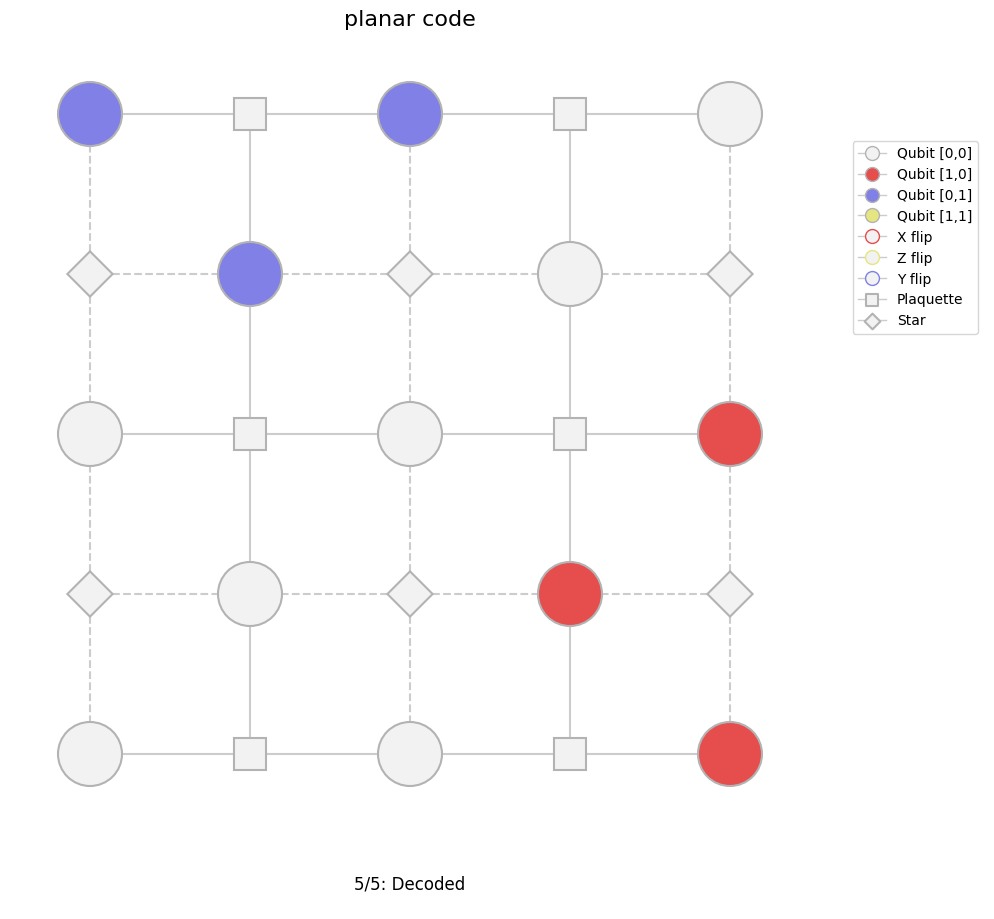

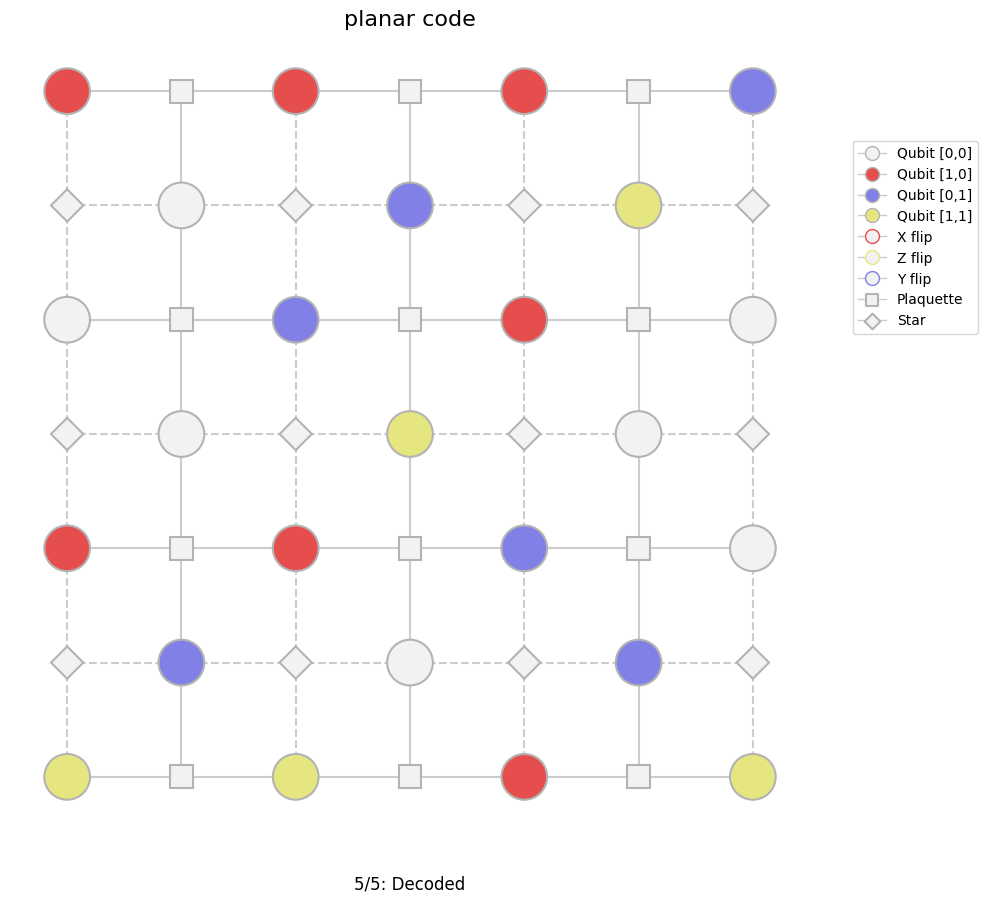

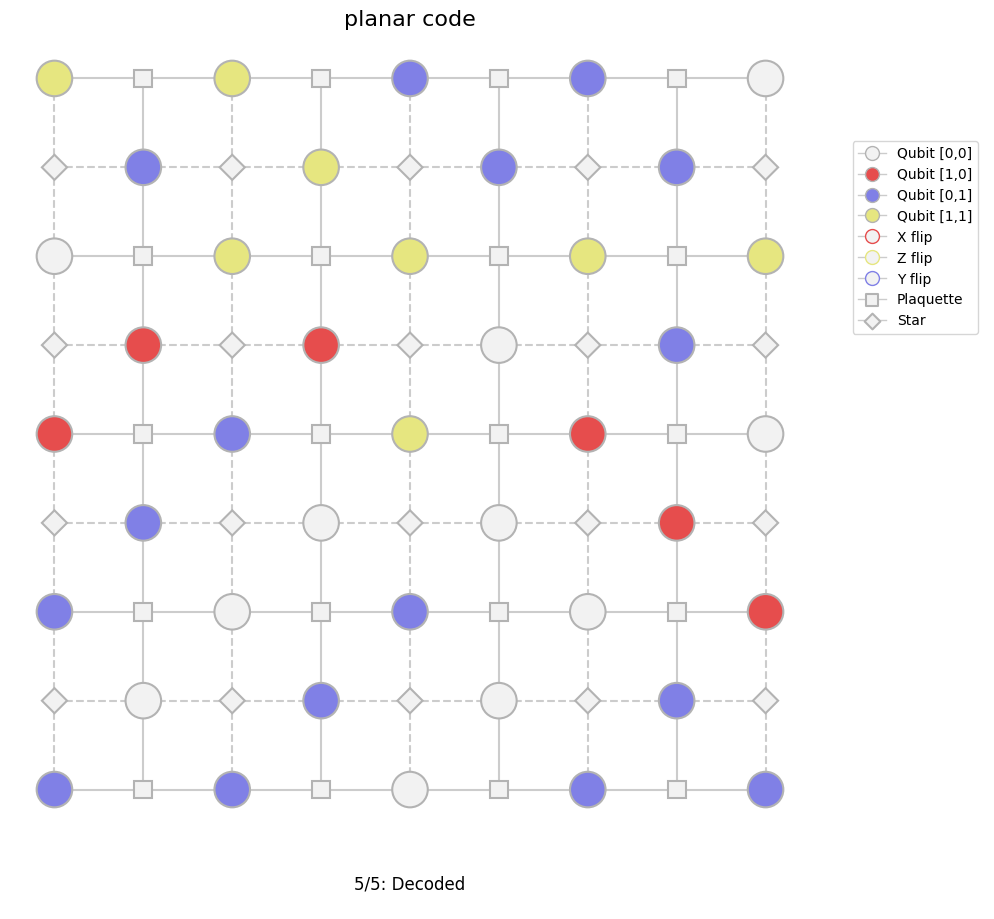

In [16]:
for i in range(2, 6):
  for j in range(2, 6):
    if(i==j):
      code, decoder = initialize((i, j), "planar", "mwpm", enabled_errors=["pauli"], plotting=True, initial_states=(0, 0))
      run(code, decoder, error_rates={"p_bitflip": 0.2, "p_phaseflip": 0.5}, decode_initial=False)

Drawing 1/1: Initial


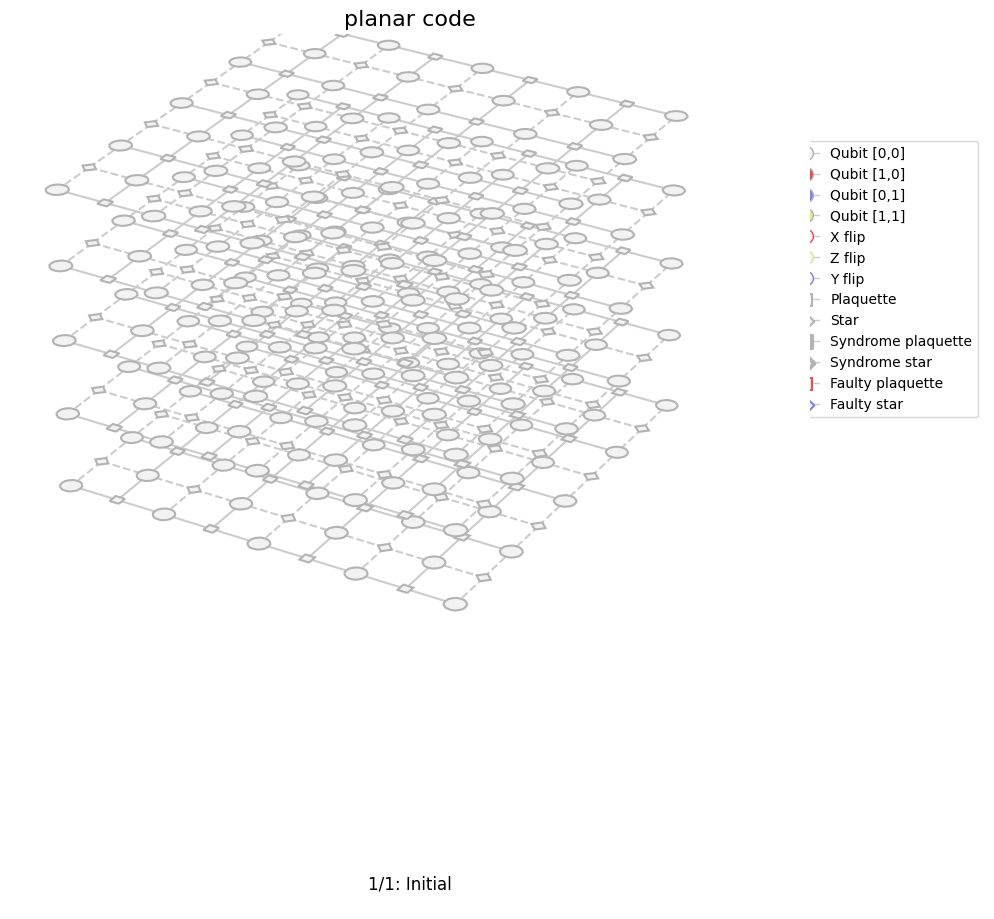

Drawing 2/2: Layer 0: errors applied


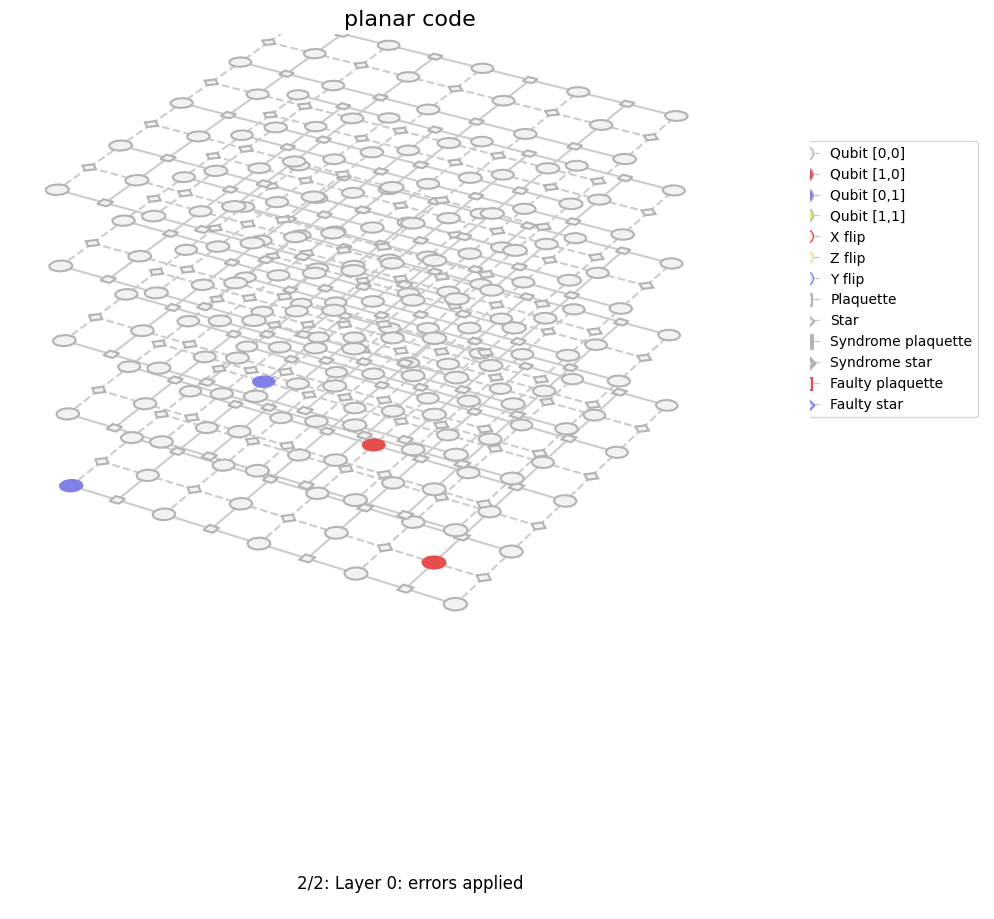

Drawing 3/3: Layer 0: ancilla-qubits measured


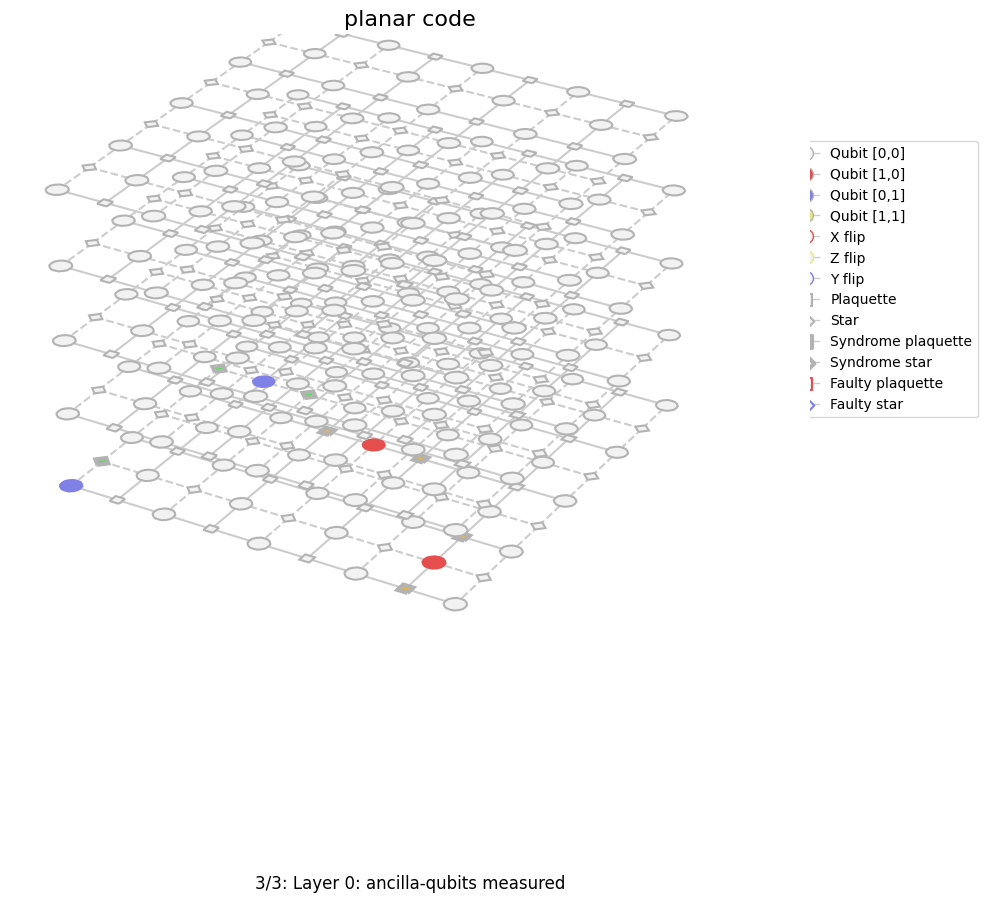

Drawing 4/4: Layer 1: errors applied


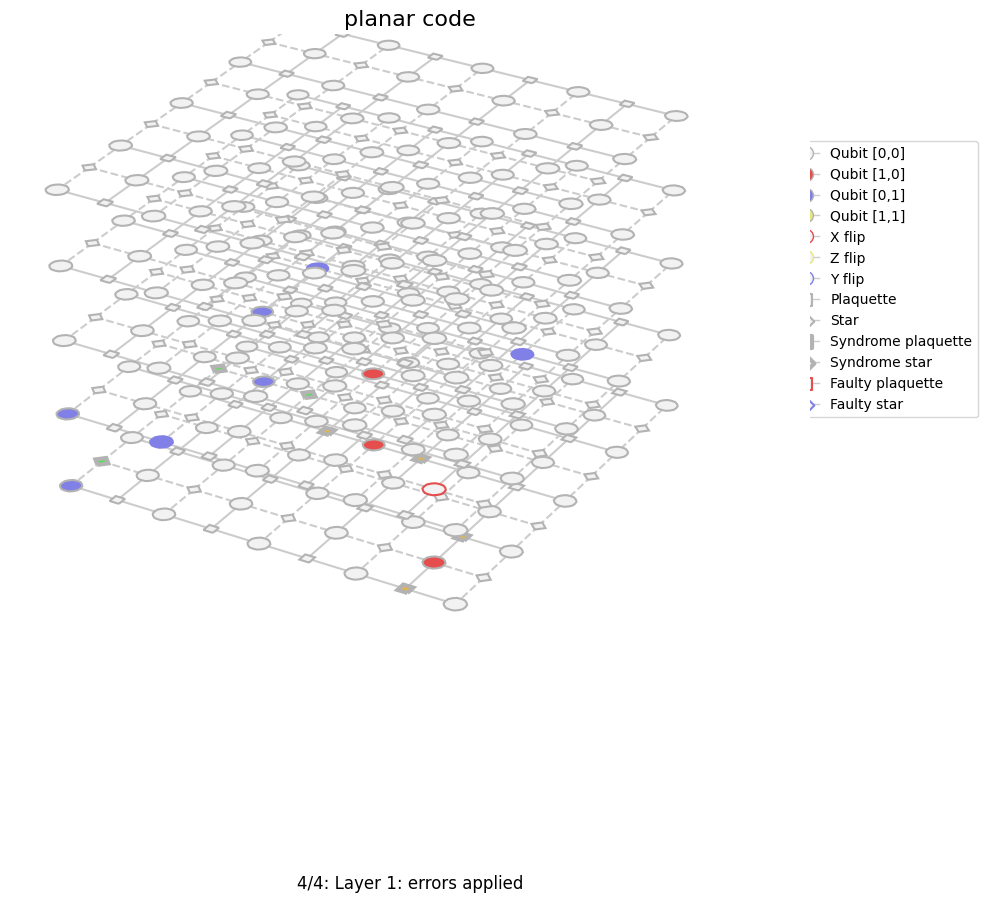

Drawing 5/5: Layer 1: ancilla-qubits measured


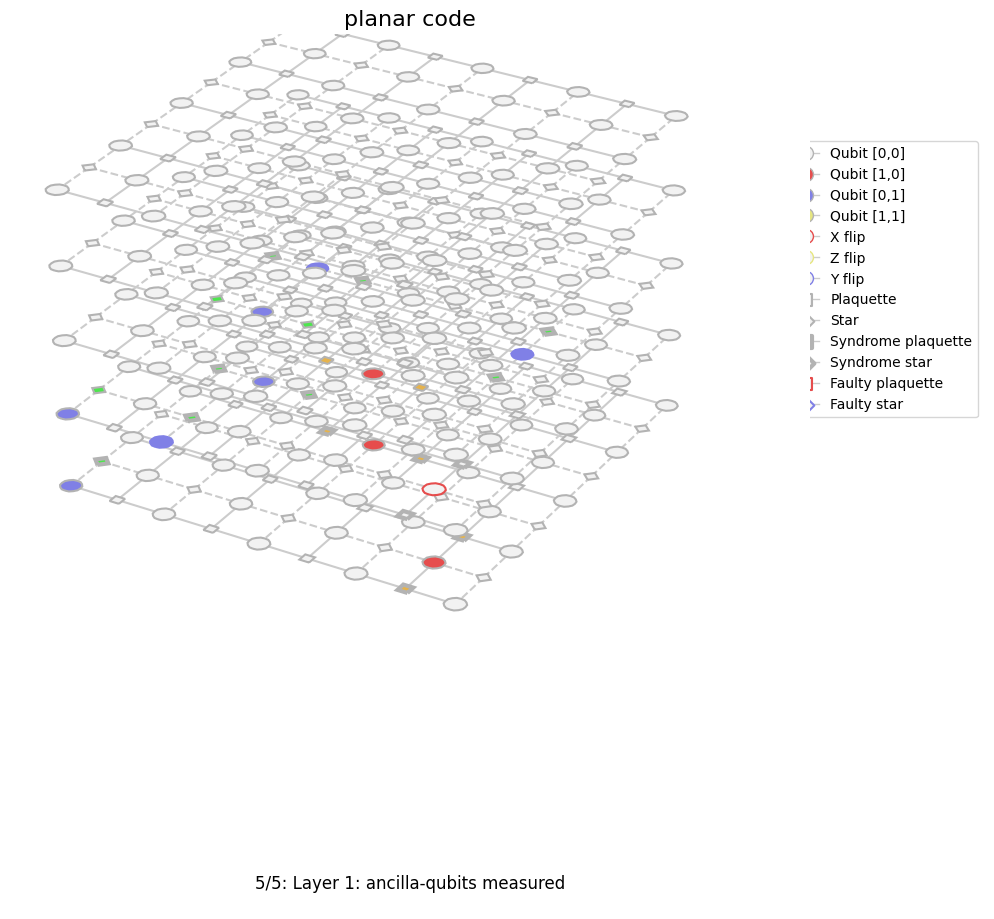

Drawing 6/6: Layer 2: errors applied


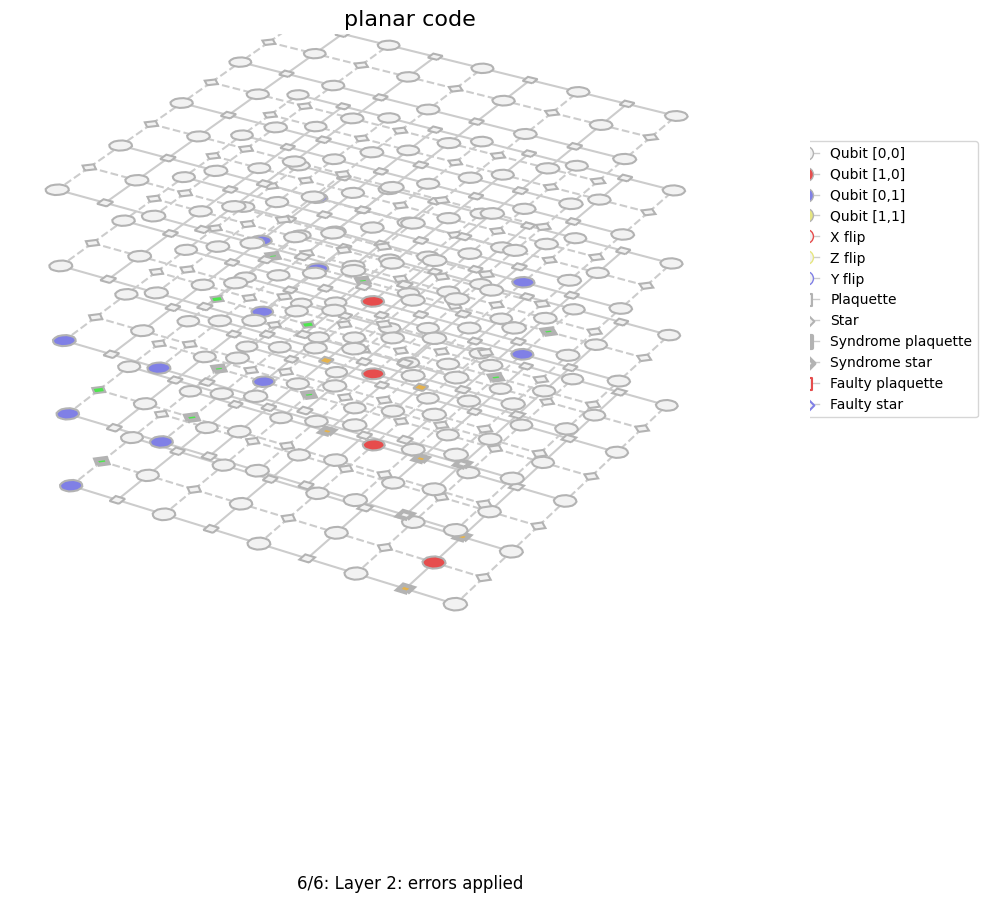

Drawing 7/7: Layer 2: ancilla-qubits measured


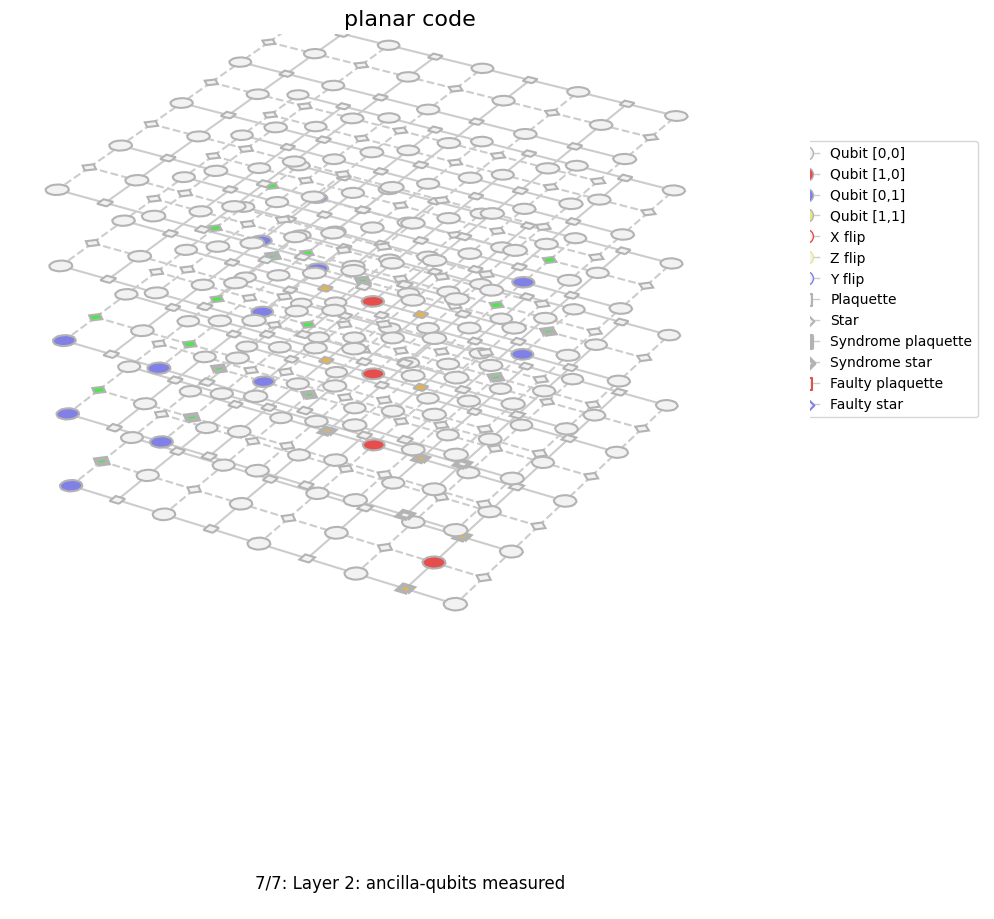

Drawing 8/8: Layer 3: errors applied


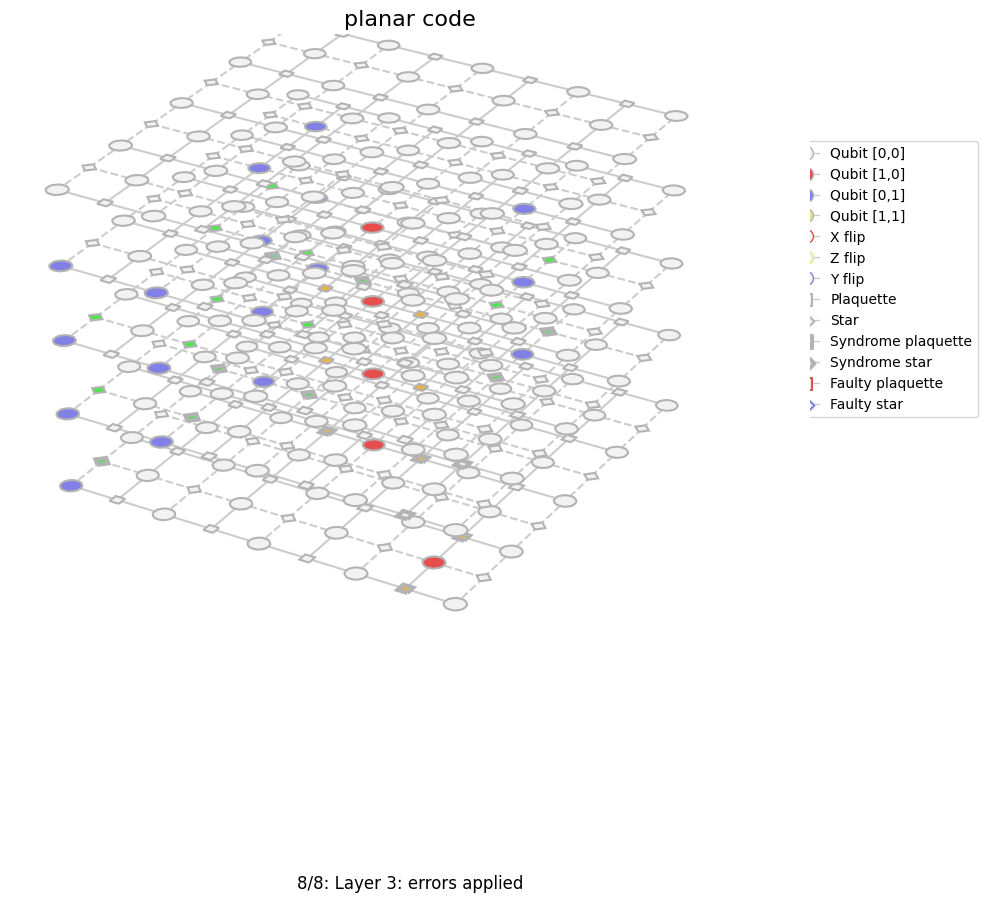

Drawing 9/9: Layer 3: ancilla-qubits measured


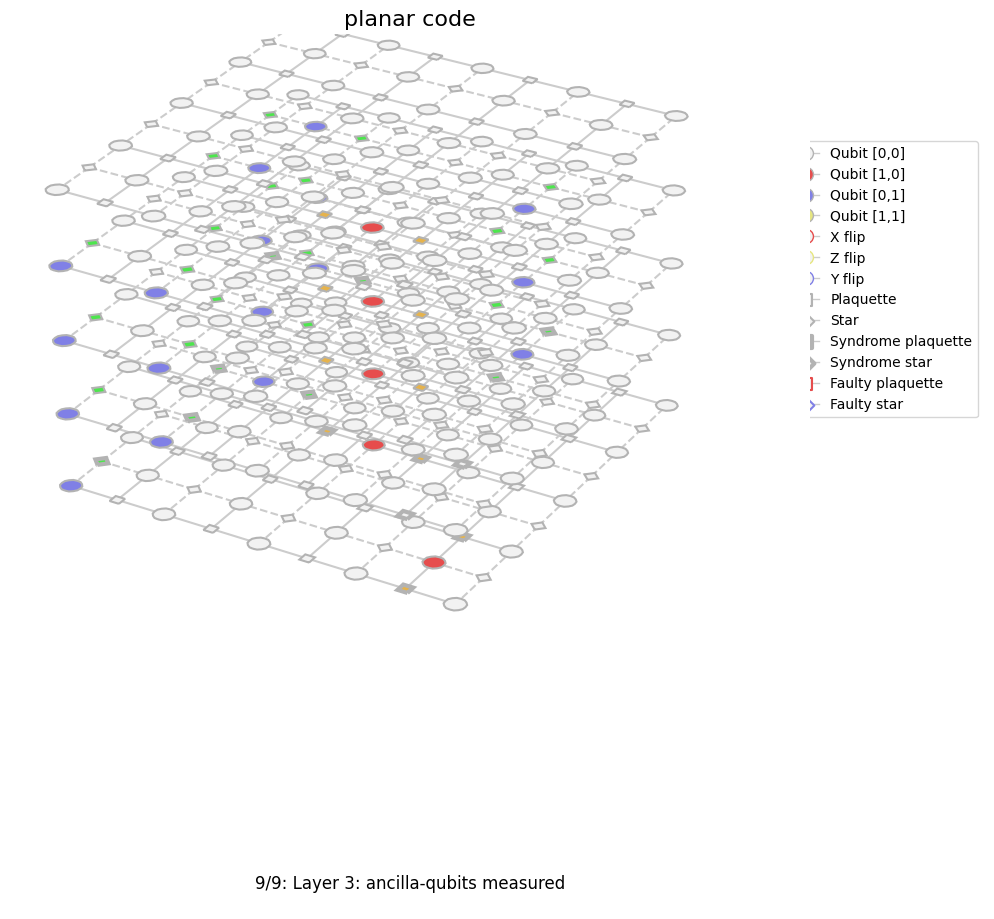

Drawing 10/10: Layer 4: errors applied


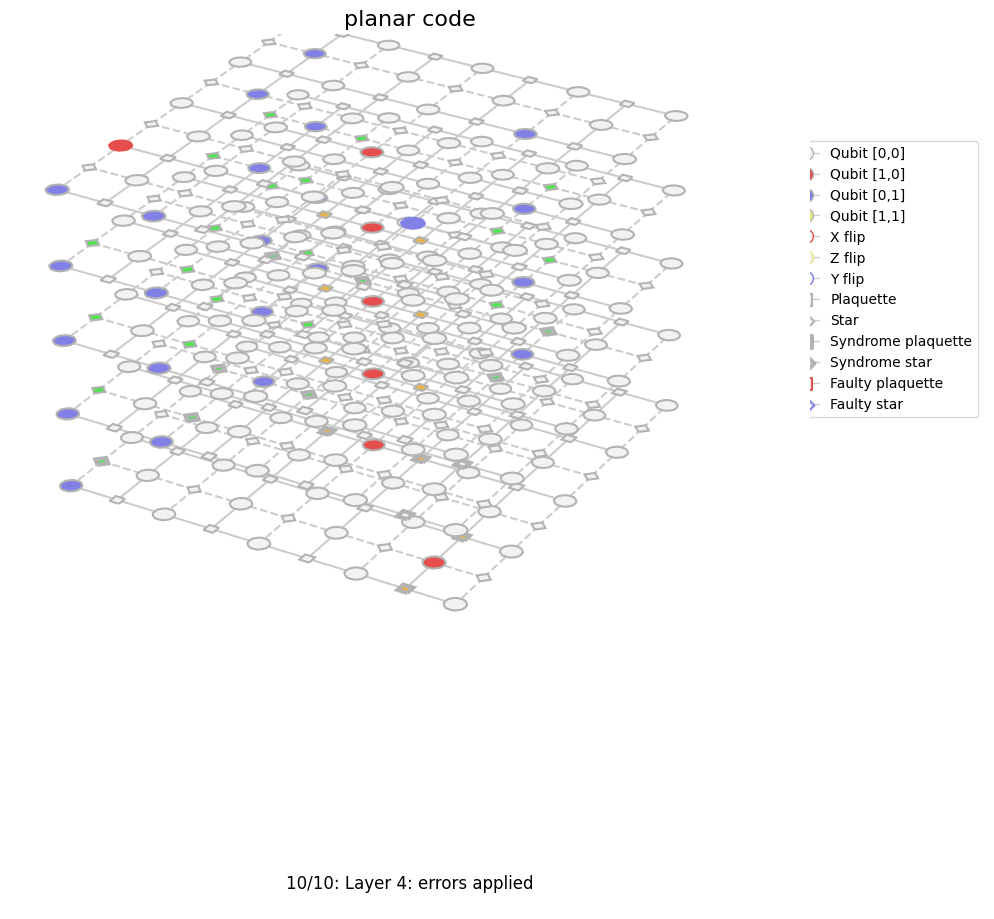

Drawing 11/11: Layer 4: ancilla-qubits measured


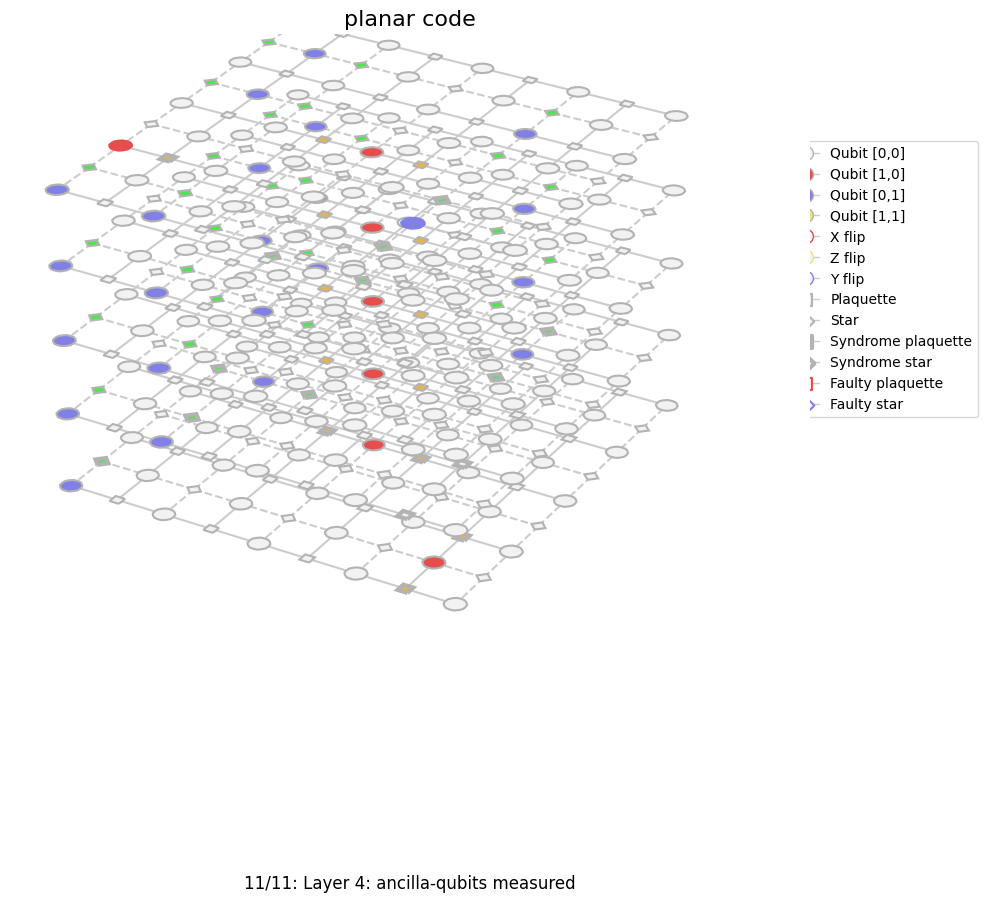

Drawing 12/12: Matchings found


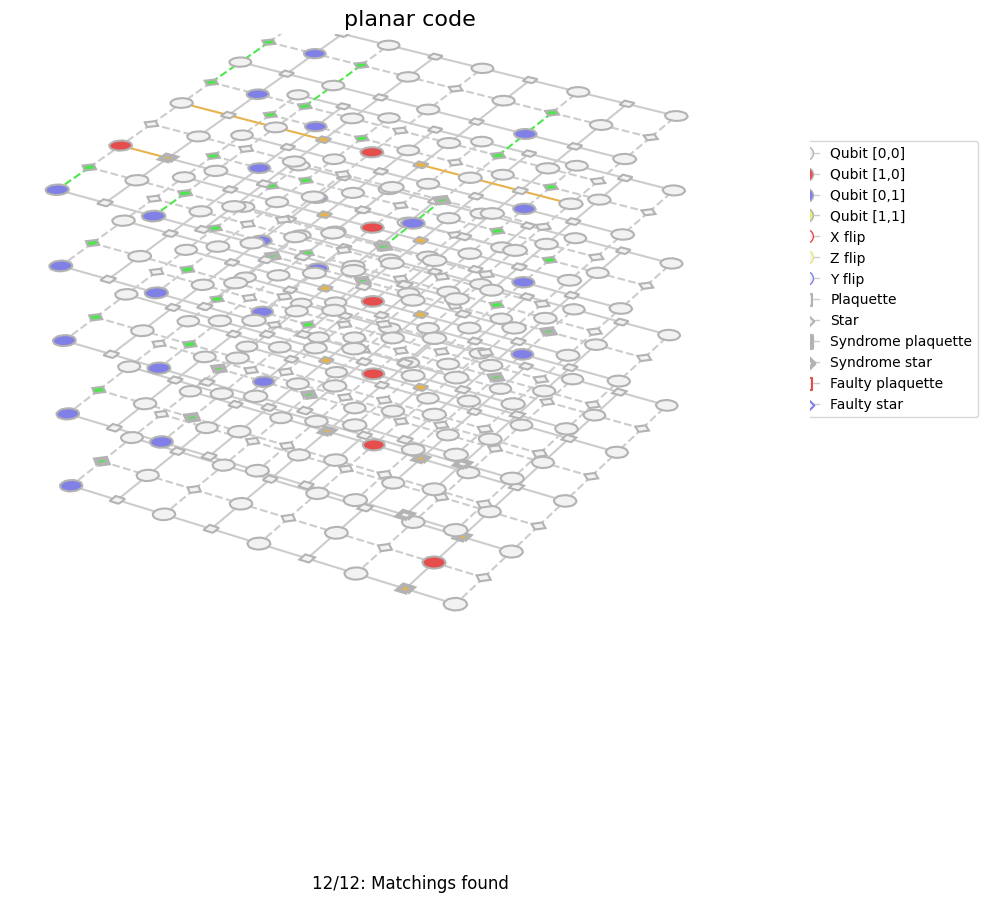

Drawing 13/13: Decoded


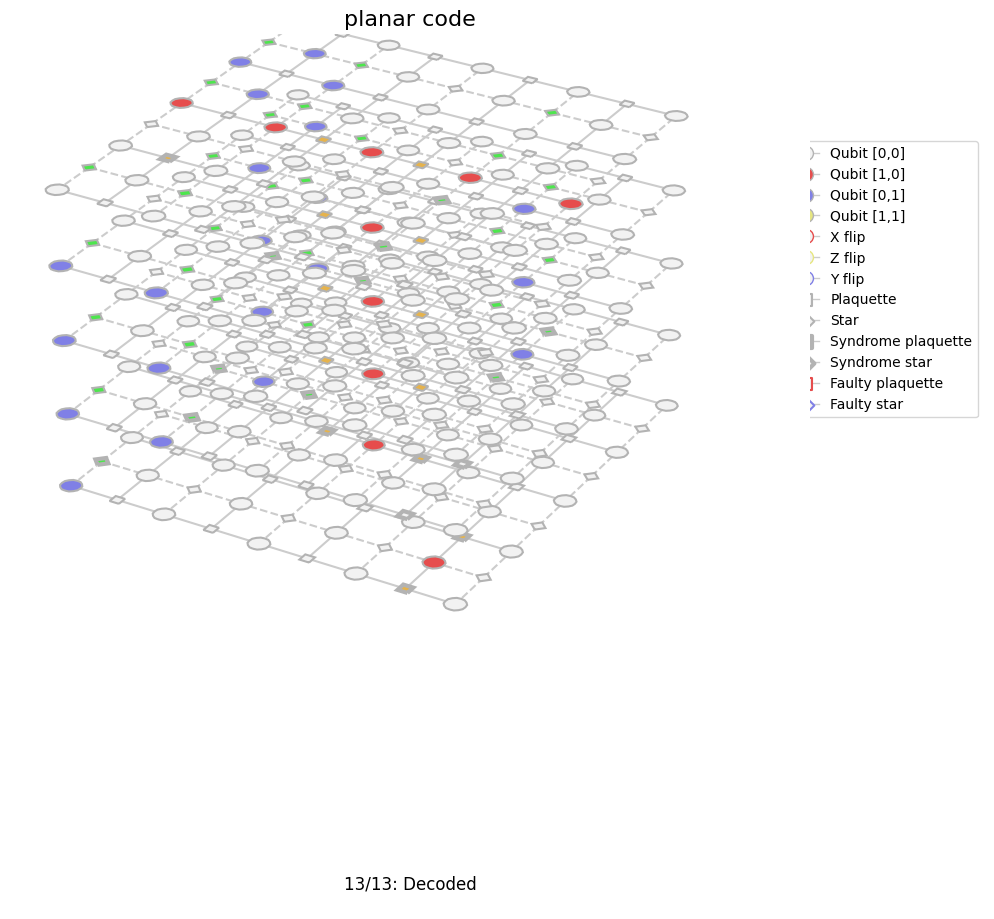

{'no_error': 0}

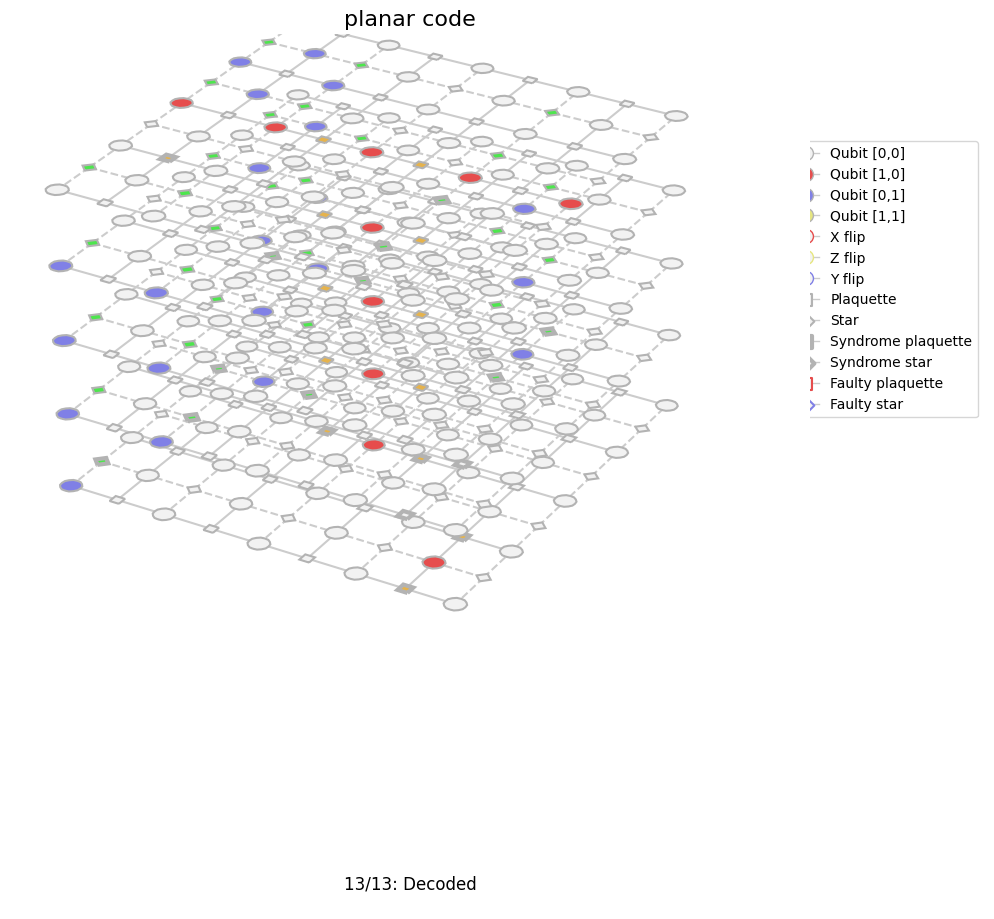

In [17]:
code, decoder = initialize((5, 5), "planar", "mwpm", enabled_errors=["pauli"], faulty_measurements=True, plotting=True, initial_states=(0, 0))
run(code, decoder, error_rates={"p_bitflip": 0.05, "p_phaseflip": 0.05}, decode_initial=False)

### Compatiability Check

In [18]:
enabled_errors = ["pauli"]
code_kwargs = {
    "initial_states": (1, 1),
    "p_bitflip": 0.1,
}
decoder_kwargs = {
    "check_compatibility": True,
    "weighted_union": False,
    "weighted_growth": False,
}

initialize((6, 6), "planar", "mwpm", enabled_errors=enabled_errors, **code_kwargs, **decoder_kwargs)

✅ This decoder is compatible with the code.


(<planar (6, 6) PerfectMeasurements>,
 <Minimum-Weight Perfect Matching decoder (Planar)>)

### Running Threshold Simulation for Creating A Dataset for Applying ML Methods

In [20]:
for i in range(2):
  data = run_many(
      "planar",
      "mwpm",
      iterations=100,
      sizes=[8, 12, 16, 20, 24],
      enabled_errors=["pauli"],
      error_rates=[{"p_bitflip": p} for p in [0.09, 0.1, 0.11, 0.12]],
  )

Running (8) lattice with error rates {'p_bitflip': 0.09}.
Running iteration 100/100
{'datetime': '12/10/2024 10:26:55',
 'decoded': 100,
 'iterations': 100,
 'no_error': 64,
 'p_bitflip': 0.09,
 'seed': 1969.200434742,
 'size': 8}
Running (8) lattice with error rates {'p_bitflip': 0.1}.
Running iteration 100/100
{'datetime': '12/10/2024 10:26:55',
 'decoded': 100,
 'iterations': 100,
 'no_error': 53,
 'p_bitflip': 0.1,
 'seed': 1969.79164976,
 'size': 8}
Running (8) lattice with error rates {'p_bitflip': 0.11}.
Running iteration 100/100
{'datetime': '12/10/2024 10:26:56',
 'decoded': 100,
 'iterations': 100,
 'no_error': 66,
 'p_bitflip': 0.11,
 'seed': 1970.46573154,
 'size': 8}
Running (8) lattice with error rates {'p_bitflip': 0.12}.
Running iteration 100/100
{'datetime': '12/10/2024 10:26:58',
 'decoded': 100,
 'iterations': 100,
 'no_error': 62,
 'p_bitflip': 0.12,
 'seed': 1971.28134681,
 'size': 8}
Running (12) lattice with error rates {'p_bitflip': 0.09}.
Running iteration 100/

### Dataset Generated From Simulation Results

In [26]:
df1 = pd.read_csv('/content/planar_planar-pauli(bit).csv')
df2 = pd.read_csv('/content/planar_planar-pauli(phase).csv')
df3 = pd.read_csv('/content/planar_planar-erasure(bit).csv')
df4 = pd.read_csv('/content/planar_planar-erasure(phase).csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/planar_planar-pauli(bit).csv'

In [ ]:
df4

### Error Configuration Preprocessing

In [ ]:
df1 = df1.drop(['Unnamed: 0', 'Unnamed: 2'], axis=1)
df2 = df2.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2','Unnamed: 3'], axis=1)
df3 = df3.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2','Unnamed: 3'], axis=1)
df4 = df4.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2','Unnamed: 3'], axis=1)

In [ ]:
df1 = df1.sort_values(by='size')

In [ ]:
result = pd.concat([df1, df2, df3, df4], axis=1)

In [ ]:
result

In [ ]:
result.to_csv(r'Content/DecoderDataset.csv', index=False)

### Ensamble Decoder

In [ ]:
decoder = pd.read_csv('DecoderDataset.csv')

In [ ]:
decoder

In [ ]:
decoder['no_error']

In [ ]:
y = decoder['no_error']
x = decoder.drop(columns=['no_error'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify= None)

In [ ]:
lin_reg = LinearRegression()

## Noise Channel Error Correction

### Circuit implementation

In [34]:
circuit = stim.Circuit.generated("surface_code:rotated_memory_x",
                                 distance=5,
                                 rounds=5,
                                 after_clifford_depolarization=0.005)

In [35]:
model = circuit.detector_error_model(decompose_errors=True)
matching = pymatching.Matching.from_detector_error_model(model)

In [36]:
sampler = circuit.compile_detector_sampler()
syndrome, actual_observables = sampler.sample(shots=1000, separate_observables=True)

In [37]:
num_errors = 0
for i in range(syndrome.shape[0]):
    predicted_obserables = matching.decode(syndrome[i, :])
    num_errors += not np.array_equal(actual_observables[i, :], predicted_obserables)

print(num_errors)

3


In [38]:
predicted_observables = matching.decode_batch(syndrome)
num_errors = np.sum(np.any(predicted_observables != actual_observables, axis=1))

print(num_errors)

3


### Error with custom CSC Matrix

In [39]:
H = csc_matrix([[1, 1, 0, 0, 0, 0, 0],
                [0, 1, 1, 0, 0, 0, 0],
                [0, 0, 1, 1, 0, 0, 0],
                [0, 0, 0, 1, 1, 0, 0],
                [0, 0, 0, 0, 0, 1, 1]])

weights = np.array([4, 3, 2, 3, 4, 4, 3])

mathcing = pymatching.Matching(H, weights = weights)

prediction = matching.decode(np.array([0, 1, 0, 1, 5]))

ValueError: The shape ((5,)) of the syndrome vector z is not valid.

# <center><font size="50" color="red">Incomplete<br>Sorry</font></center>